# World Development Indicators

World Development indicators (panel data) - Discover factors for contry economic development and make recommendations

Economists have developed various measures to assess the development of a nation or country like Gross National Income, Per Capita Income, Human Development Index, Physical Quality of Life Index and so on. One of the most important and a simple measure of economic development among them is per capita income.
https://www.microeconomicsnotes.com/economic-development-2/how-to-measure-economic-development-of-a-country-with-formula/14897

#### Cotntry / Region / IncomeGroup

as per file "WDICountry.csv"

        COUNTRY     - REGION                      - INCOME DEFINITION
        Croatia		- Europe & Central Asia       - High income
        Cyprus	 	- Europe & Central Asia       - High income
        Greece	 	- Europe & Central Asia       - High income
        Malta	  	- Middle East & North Africa  - High income
        Morocco		- Middle East & North Africa  - Lower middle income
        Nigeria		- Middle East & North Africa  - Upper middle income
        Ecuador		- Latin America & Caribbean   - Upper middle income
        Uruguay		- Latin America & Caribbean   - High income
        Paraguay   	- Latin America & Caribbean   - Lower middle income


#### Economic Development Indicators

as per "WDIData.csv" - this is the file for analysis

Y == Life expectancy at birth, total (years) (1)


HEALTH
- Current health expenditure per capita, PPP (current international) (1)
- Hospital beds (per 1,000 people) (1)

- Domestic general government health expenditure per capita, PPP (current international)
- Domestic private health expenditure per capita, PPP (current international)
- Mortality rate, infant (per 1,000 live births)
- Physicians (per 1,000 people)


UNEMPLOYMENT per EDUCATION
- Unemployment with advanced education (% of total labor force with advanced education)
- Unemployment with basic education (% of total labor force with basic education)
- Unemployment with intermediate education (% of total labor force with intermediate education)


UNEMPLOYMENT
- Unemployment, total (% of total labor force) (modeled ILO estimate)


EDUCATION
- Literacy rate, adult total (% of females ages 15 and above)
- Current education expenditure, total (% of total expenditure in public institutions)


WORKING per SALARY
- GDP per capita, PPP (current international) (1)
- Labor force participation rate for ages 15-24, total (%) (national estimate) (1)
- Labor force with advanced education (% of total working-age population with advanced education) (1)
- Wage and salaried workers, total (% of total employment) (modeled ILO estimate)


PRODUCTION
- Medium and high-tech exports (% manufactured exports) (1)

## Libraries

In [368]:
import pandas as pd # import CSV data
import numpy as np # numeric operations
import matplotlib.pyplot as plt # plot
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
# Define the project path:
projpath = r"D:\PhD\DataScience\SummerSchool2021\Task\2-data"

## Importing data

In [3]:
#Read in the data from the project directory; the data is represented as a table, here refered to as dataframe
ds = os.path.join(projpath, r"WDIData.csv")
data = pd.read_csv(ds)

In [4]:
data.shape

(380952, 66)

In [5]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [6]:
data.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
2  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2012       2013       2014  \
0   NaN   NaN   NaN   NaN   NaN  ...  83.120303  83.533457  83.897596   
1   NaN   NaN   NaN   NaN   NaN  ...  86.099146  88.101280  87.201762   
2   NaN   NaN   NaN   NaN   NaN  ...  73.772130  78.030079  76.216620   

        2015       2016       2017       2018       2019  2020  Unnamed: 65  
0  84.171599  84.510171        NaN        NaN        NaN   NaN          NaN  
1  87.935480  88.504036  89.623031  88.305919  89.512282   NaN          NaN  
2  77.573293  78.460673  80.861655  78.032524  80.095767   NaN          NaN  

[3 rows x 66 columns]

In [7]:
#Check duplicated data.
sum(data.duplicated(subset=None))

0

## Data Transformation

### Remove Not Needed Columns

In [8]:
# Remove column name 'A'
data = data.drop(['Unnamed: 65', 'Country Code', 'Indicator Name'], axis = 1)

In [9]:
# data = data.drop(['Unnamed: 65'], axis = 1)

In [10]:
data.shape

(380952, 63)

In [11]:
data.columns

Index(['Country Name', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [12]:
# data.pivot(index="Country Name", columns="Indicator Code", values="Value")

In [13]:
# test = data.melt(data, id_vars=['Country Name'], var_name='colvals', value_name='DOPU')

### Data Transpose

In [14]:
# data_tr = data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Code'], 
#         var_name="Date", 
#         value_name="Value")

In [15]:
data_tr = (data.set_index(['Country Name', 'Indicator Code'])
         .stack()
         .reset_index(name='Value')
         .rename(columns={'level_2':'Date'}))

In [16]:
data_tr.head()

Country Name  Indicator Code  Date      Value
0   Arab World  EG.CFT.ACCS.ZS  2000  73.702495
1   Arab World  EG.CFT.ACCS.ZS  2001  74.944860
2   Arab World  EG.CFT.ACCS.ZS  2002  76.258066
3   Arab World  EG.CFT.ACCS.ZS  2003  77.120464
4   Arab World  EG.CFT.ACCS.ZS  2004  78.094440

In [17]:
# data_test = data_tr["Country Name", "Indicator Code"].sort_index

In [18]:
data_tr.shape

(7635752, 4)

In [19]:
data_tr.head()

Country Name  Indicator Code  Date      Value
0   Arab World  EG.CFT.ACCS.ZS  2000  73.702495
1   Arab World  EG.CFT.ACCS.ZS  2001  74.944860
2   Arab World  EG.CFT.ACCS.ZS  2002  76.258066
3   Arab World  EG.CFT.ACCS.ZS  2003  77.120464
4   Arab World  EG.CFT.ACCS.ZS  2004  78.094440

In [20]:
data_tr.tail()

Country Name  Indicator Code  Date    Value
7635747     Zimbabwe  SH.HIV.INCD.YG  2015  18000.0
7635748     Zimbabwe  SH.HIV.INCD.YG  2016  16000.0
7635749     Zimbabwe  SH.HIV.INCD.YG  2017  15000.0
7635750     Zimbabwe  SH.HIV.INCD.YG  2018  13000.0
7635751     Zimbabwe  SH.HIV.INCD.YG  2019  13000.0

### Data Filtering

#### Take only Countries:
"Croatia","Cyprus","Greece","Malta","Morocco","Ecuador","Paraguay","Uruguay","Nigeria"

In [21]:
data_tr_sorted = data_tr[((data_tr['Country Name'] == 'Croatia') | (data_tr['Country Name'] == 'Cyprus') | 
                   (data_tr['Country Name'] == 'Greece') | (data_tr['Country Name'] == 'Malta') | 
                   (data_tr['Country Name'] == 'Morocco') | (data_tr['Country Name'] == 'Ecuador') | 
                   (data_tr['Country Name'] == 'Paraguay') | (data_tr['Country Name'] == 'Uruguay') | 
                   (data_tr['Country Name'] == 'Nigeria')
                  )]

In [22]:
data_tr_sorted.shape

(331873, 4)

In [23]:
data_tr_sorted['Country Name'].nunique(dropna = True)

9

In [24]:
data_tr_sorted['Country Name'].unique()

array(['Croatia', 'Cyprus', 'Ecuador', 'Greece', 'Malta', 'Morocco',
       'Nigeria', 'Paraguay', 'Uruguay'], dtype=object)

In [25]:
data_tr_sorted['Country Name'].value_counts().fillna("-99")

Ecuador     41578
Morocco     41328
Paraguay    39506
Uruguay     39173
Greece      36420
Cyprus      36105
Nigeria     35969
Malta       34603
Croatia     27191
Name: Country Name, dtype: int64

In [26]:
data_tr_sorted['Region'] = np.where(data_tr_sorted['Country Name'] =="Croatia", 'Europe & Central Asia',
                                    np.where(data_tr_sorted['Country Name'] =="Cyprus", 'Europe & Central Asia',
                                    np.where(data_tr_sorted['Country Name'] =="Greece", 'Europe & Central Asia',
                                    np.where(data_tr_sorted['Country Name'] =="Malta", 'Middle East & North Africa',
                                    np.where(data_tr_sorted['Country Name'] =="Morocco", 'Middle East & North Africa',
                                    np.where(data_tr_sorted['Country Name'] =="Nigeria", 'Middle East & North Africa',
                                    np.where(data_tr_sorted['Country Name'] =="Ecuador", 'Latin America & Caribbean',
                                    np.where(data_tr_sorted['Country Name'] =="Uruguay", 'Latin America & Caribbean',
                                    np.where(data_tr_sorted['Country Name'] =="Paraguay", 'Latin America & Caribbean',
                                    'other')))))))))

<ipython-input-26-becd953381fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr_sorted['Region'] = np.where(data_tr_sorted['Country Name'] =="Croatia", 'Europe & Central Asia',


In [27]:
data_tr_sorted['Region'].value_counts().fillna("-99")

Latin America & Caribbean     120257
Middle East & North Africa    111900
Europe & Central Asia          99716
Name: Region, dtype: int64

#### Take only Indicators that we have been selected:

HEALTH
- Current health expenditure per capita, PPP (current international) (1)
- Hospital beds (per 1,000 people) (1)

- Domestic general government health expenditure per capita, PPP (current international)
- Domestic private health expenditure per capita, PPP (current international)
- Mortality rate, infant (per 1,000 live births)
- Physicians (per 1,000 people)


UNEMPLOYMENT per EDUCATION
- Unemployment with advanced education (% of total labor force with advanced education)
- Unemployment with basic education (% of total labor force with basic education)
- Unemployment with intermediate education (% of total labor force with intermediate education)


UNEMPLOYMENT
- Unemployment, total (% of total labor force) (modeled ILO estimate)


EDUCATION
- Literacy rate, adult total (% of females ages 15 and above)
- Current education expenditure, total (% of total expenditure in public institutions)


WORKING per SALARY
- GDP per capita, PPP (current international) (1)
- Labor force participation rate for ages 15-24, total (%) (national estimate) (1)
- Labor force with advanced education (% of total working-age population with advanced education) (1)
- Wage and salaried workers, total (% of total employment) (modeled ILO estimate)


PRODUCTION
- Medium and high-tech exports (% manufactured exports) (1)

In [28]:
data_tr_sorted = data_tr_sorted[((data_tr['Indicator Code'] == 'SL.TLF.ADVN.ZS') 
                                 | (data_tr['Indicator Code'] == 'NY.GDP.PCAP.PP.CD')
                                 | (data_tr['Indicator Code'] == 'SH.MED.BEDS.ZS') 
                                 | (data_tr['Indicator Code'] == 'SL.TLF.ACTI.1524.NE.ZS') 
#                                 | (data_tr['Indicator Code'] == 'SL.TLF.ADVN.ZS')
                                 | (data_tr['Indicator Code'] == 'SP.DYN.LE00.IN') 
                                 | (data_tr['Indicator Code'] == 'TX.MNF.TECH.ZS.UN')    
                                 | (data_tr['Indicator Code'] == 'SH.XPD.CHEX.PP.CD')
                                 | (data_tr['Indicator Code'] == 'SH.XPD.GHED.PP.CD')
                                 | (data_tr['Indicator Code'] == 'SH.XPD.PVTD.PP.CD')
                                 | (data_tr['Indicator Code'] == 'SL.UEM.ADVN.ZS')
                                 | (data_tr['Indicator Code'] == 'SL.UEM.BASC.ZS')
                                 | (data_tr['Indicator Code'] == 'SL.UEM.INTM.ZS')
                                 | (data_tr['Indicator Code'] == 'SL.UEM.TOTL.ZS')
                                 | (data_tr['Indicator Code'] == 'SL.EMP.WORK.ZS')     
                                 | (data_tr['Indicator Code'] == 'SE.ADT.LITR.ZS')
                                 | (data_tr['Indicator Code'] == 'SE.XPD.CTOT.ZS')
                                 | (data_tr['Indicator Code'] == 'SP.DYN.IMRT.IN')
                                 | (data_tr['Indicator Code'] == 'SH.XPD.CHEX.PC.CD')

                  )]

<ipython-input-28-0fcf1f007f66>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_tr_sorted = data_tr_sorted[((data_tr['Indicator Code'] == 'SL.TLF.ADVN.ZS')


In [29]:
data_tr_sorted.shape

(3984, 5)

In [30]:
data_tr_sorted = data_tr_sorted.reset_index(drop=True)

In [31]:
data_tr_sorted.head()

Country Name  Indicator Code  Date      Value                 Region
0      Croatia  SE.XPD.CTOT.ZS  2002  91.096848  Europe & Central Asia
1      Croatia  SE.XPD.CTOT.ZS  2003  92.676529  Europe & Central Asia
2      Croatia  SE.XPD.CTOT.ZS  2004  95.571457  Europe & Central Asia
3      Croatia  SE.XPD.CTOT.ZS  2007  94.703499  Europe & Central Asia
4      Croatia  SE.XPD.CTOT.ZS  2008  96.632767  Europe & Central Asia

In [32]:
data_fin = data_tr_sorted.assign(index=data_tr_sorted.groupby('Indicator Code').cumcount()).pivot(['Country Name','Date','Region'], 'Indicator Code', ['Value'])

In [33]:
pd.options.display.max_rows = None
data_fin.head()

Value                 \
Indicator Code                          NY.GDP.PCAP.PP.CD SE.ADT.LITR.ZS   
Country Name Date Region                                                   
Croatia      1960 Europe & Central Asia               NaN            NaN   
             1961 Europe & Central Asia               NaN            NaN   
             1962 Europe & Central Asia               NaN            NaN   
             1963 Europe & Central Asia               NaN            NaN   
             1964 Europe & Central Asia               NaN            NaN   

                                                                       \
Indicator Code                          SE.XPD.CTOT.ZS SH.MED.BEDS.ZS   
Country Name Date Region                                                
Croatia      1960 Europe & Central Asia            NaN            NaN   
             1961 Europe & Central Asia            NaN            NaN   
             1962 Europe & Central Asia            NaN            NaN   
             1963 Europe & Central Asia            NaN            NaN   
             1964 Europe & Central Asia            NaN            NaN   

                                                                             \
Indicator Code                          SH.XPD.CHEX.PC.CD SH.XPD.CHEX.PP.CD   
Country Name Date Region                                                      
Croatia      1960 Europe & Central Asia               NaN               NaN   
             1961 Europe & Central Asia               NaN               NaN   
             1962 Europe & Central Asia               NaN               NaN   
             1963 Europe & Central Asia               NaN               NaN   
             1964 Europe & Central Asia               NaN               NaN   

                                                                             \
Indicator Code                          SH.XPD.GHED.PP.CD SH.XPD.PVTD.PP.CD   
Country Name Date Region                                                      
Croatia      1960 Europe & Central Asia               NaN               NaN   
             1961 Europe & Central Asia               NaN               NaN   
             1962 Europe & Central Asia               NaN               NaN   
             1963 Europe & Central Asia               NaN               NaN   
             1964 Europe & Central Asia               NaN               NaN   

                                                                               \
Indicator Code                          SL.EMP.WORK.ZS SL.TLF.ACTI.1524.NE.ZS   
Country Name Date Region                                                        
Croatia      1960 Europe & Central Asia            NaN                    NaN   
             1961 Europe & Central Asia            NaN                    NaN   
             1962 Europe & Central Asia            NaN                    NaN   
             1963 Europe & Central Asia            NaN                    NaN   
             1964 Europe & Central Asia            NaN                    NaN   

                                                                       \
Indicator Code                          SL.TLF.ADVN.ZS SL.UEM.ADVN.ZS   
Country Name Date Region                                                
Croatia      1960 Europe & Central Asia            NaN            NaN   
             1961 Europe & Central Asia            NaN            NaN   
             1962 Europe & Central Asia            NaN            NaN   
             1963 Europe & Central Asia            NaN            NaN   
             1964 Europe & Central Asia            NaN            NaN   

                                                                       \
Indicator Code                          SL.UEM.BASC.ZS SL.UEM.INTM.ZS   
Country Name Date Region                                                
Croatia      1960 Europe & Central Asia            NaN            NaN   
             1961 Europe & Central Asia            NaN            

In [34]:
data_fin.shape

(549, 18)

In [35]:
# data_fin.reset_index(drop=True, inplace=True)

#### Rename Columns in the dataset

- GDP -> NY.GDP.PCAP.PP.CD
- Hospital_Beds -> SH.MED.BEDS.ZS
- Health_Expenditure -> SH.XPD.CHEX.PP.CD
- Government_Health_Expenditure -> SH.XPD.GHED.PP.CD
- Private_Health_Expenditure -> SH.XPD.PVTD.PP.CD
- Salaried_Workers -> SL.EMP.WORK.ZS
- Labor_Force_15_24y -> SL.TLF.ACTI.1524.NE.ZS
- Labor_Force_Advanced_Education -> SL.TLF.ADVN.ZS
- Unemployment_Advanced_Education -> SL.UEM.ADVN.ZS
- Unemployment_Basic_Education -> SL.UEM.BASC.ZS
- Unemployment_Intermediate_Education -> SL.UEM.INTM.ZS
- Unemployment_total -> SL.UEM.TOTL.ZS
- Life_Expectancy -> SP.DYN.LE00.IN
- High-tech_manuf_exports -> TX.MNF.TECH.ZS.UN

- Adult_literacy -> SE.ADT.LITR.ZS
- Current_Education_Expenditure_tot -> SE.XPD.CTOT.ZS
- Mortality_rate -> SP.DYN.IMRT.IN


In [36]:
data_fin.columns

MultiIndex([('Value',      'NY.GDP.PCAP.PP.CD'),
            ('Value',         'SE.ADT.LITR.ZS'),
            ('Value',         'SE.XPD.CTOT.ZS'),
            ('Value',         'SH.MED.BEDS.ZS'),
            ('Value',      'SH.XPD.CHEX.PC.CD'),
            ('Value',      'SH.XPD.CHEX.PP.CD'),
            ('Value',      'SH.XPD.GHED.PP.CD'),
            ('Value',      'SH.XPD.PVTD.PP.CD'),
            ('Value',         'SL.EMP.WORK.ZS'),
            ('Value', 'SL.TLF.ACTI.1524.NE.ZS'),
            ('Value',         'SL.TLF.ADVN.ZS'),
            ('Value',         'SL.UEM.ADVN.ZS'),
            ('Value',         'SL.UEM.BASC.ZS'),
            ('Value',         'SL.UEM.INTM.ZS'),
            ('Value',         'SL.UEM.TOTL.ZS'),
            ('Value',         'SP.DYN.IMRT.IN'),
            ('Value',         'SP.DYN.LE00.IN'),
            ('Value',      'TX.MNF.TECH.ZS.UN')],
           names=[None, 'Indicator Code'])

In [37]:
data_fin.columns = [#'Country Name','Date','Region',
                    'GDP',
                    'Adult_literacy',
                    'Current_Education_Expenditure_tot',
                    'Hospital_Beds',
                    'Physicians',
                    'Health_Expenditure',
                    'Government_Health_Expenditure',
                    'Private_Health_Expenditure',
                    'Salaried_Workers',
                    'Labor_Force_15_24y',
                    'Labor_Force_Advanced_Education',
                    'Unemployment_Advanced_Education',
                    'Unemployment_Basic_Education',
                    'Unemployment_Intermediate_Education',
                    'Unemployment_total',
                    'Mortality_rate',
                    'Life_Expectancy',
                    'High-tech_manuf_exports'
                   ]

### Another Transpose

In [38]:
data_fin.reset_index(inplace=True)

In [39]:
data_fin.head(3)

Country Name  Date                 Region  GDP  Adult_literacy  \
0      Croatia  1960  Europe & Central Asia  NaN             NaN   
1      Croatia  1961  Europe & Central Asia  NaN             NaN   
2      Croatia  1962  Europe & Central Asia  NaN             NaN   

   Current_Education_Expenditure_tot  Hospital_Beds  Physicians  \
0                                NaN            NaN         NaN   
1                                NaN            NaN         NaN   
2                                NaN            NaN         NaN   

   Health_Expenditure  Government_Health_Expenditure  ...  Salaried_Workers  \
0                 NaN                            NaN  ...               NaN   
1                 NaN                            NaN  ...               NaN   
2                 NaN                            NaN  ...               NaN   

   Labor_Force_15_24y  Labor_Force_Advanced_Education  \
0                 NaN                             NaN   
1                 NaN                             NaN   
2                 NaN                             NaN   

   Unemployment_Advanced_Education  Unemployment_Basic_Education  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   

   Unemployment_Intermediate_Education  Unemployment_total  Mortality_rate  \
0                                  NaN                 NaN             NaN   
1                                  NaN                 NaN             NaN   
2                                  NaN                 NaN             NaN   

   Life_Expectancy  High-tech_manuf_exports  
0        64.608659                      NaN  
1        65.015512                      NaN  
2        65.408244                      NaN  

[3 rows x 21 columns]

### Save out working file

In [40]:
data_fin.to_csv(r'D:\PhD\DataScience\SummerSchool2021\Task\4-sent\my_new_file.csv', index=True)

In [41]:
data_fin['Date'] = data_fin['Date'].astype('int')

### Data Visualization

In [42]:
# Let's check the situation for in the last 40 years
data_fin90 = data_fin[(data_fin['Date'] > 1989)]

<AxesSubplot:xlabel='Date', ylabel='GDP'>

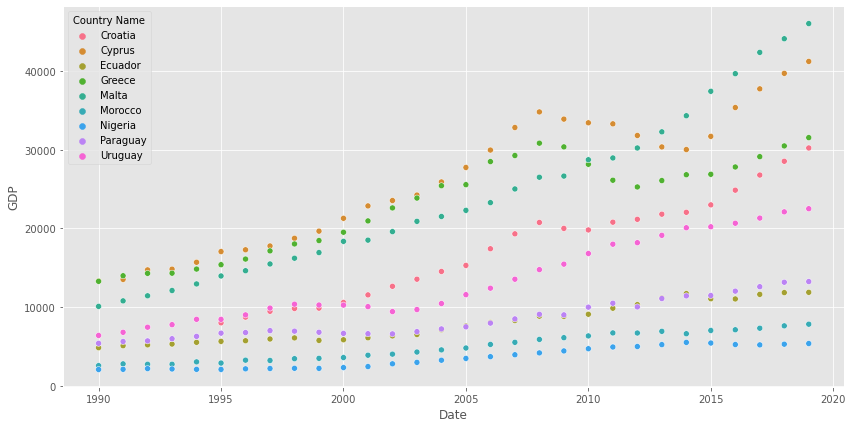

In [43]:
# GDP
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['GDP'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Hospital_Beds'>

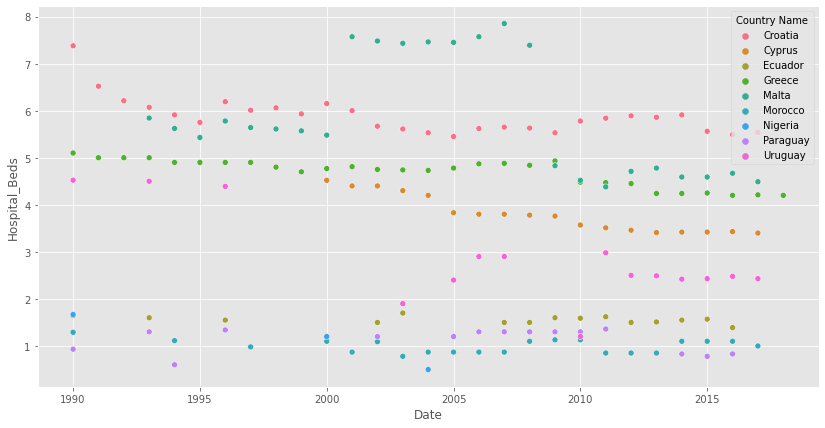

In [44]:
# Hospital_Beds
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Hospital_Beds'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Health_Expenditure'>

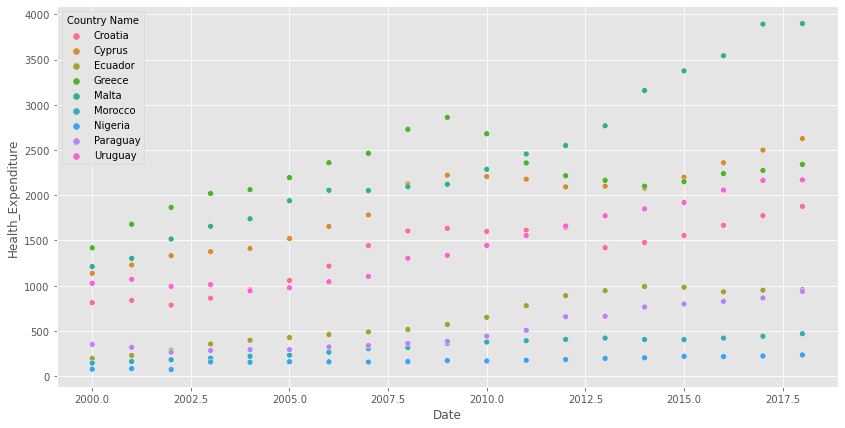

In [45]:
# Health_Expenditure
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Health_Expenditure'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Government_Health_Expenditure'>

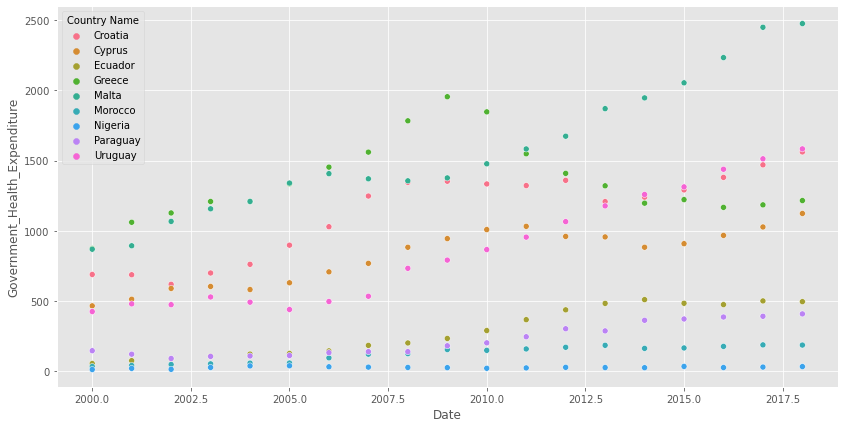

In [46]:
# Government_Health_Expenditure
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Government_Health_Expenditure'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Private_Health_Expenditure'>

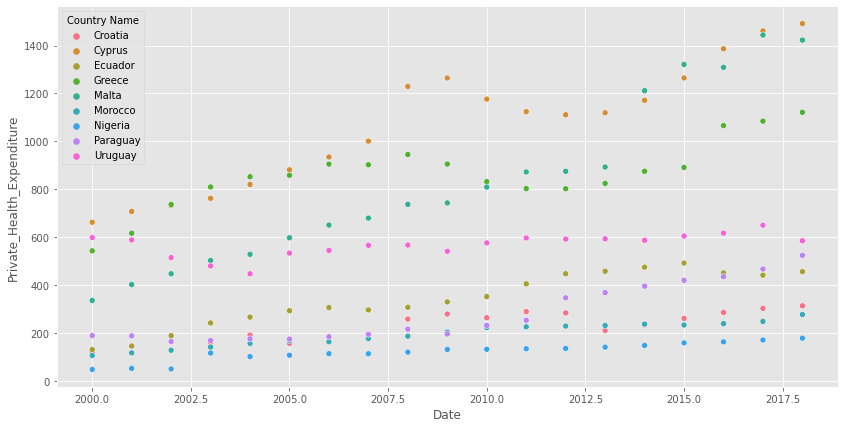

In [47]:
# Private_Health_Expenditure
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Private_Health_Expenditure'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Salaried_Workers'>

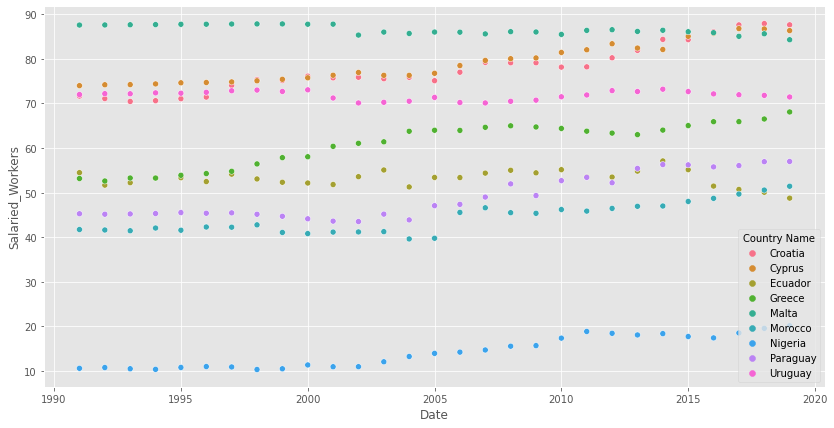

In [48]:
# Salaried_Workers
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Salaried_Workers'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Labor_Force_15_24y'>

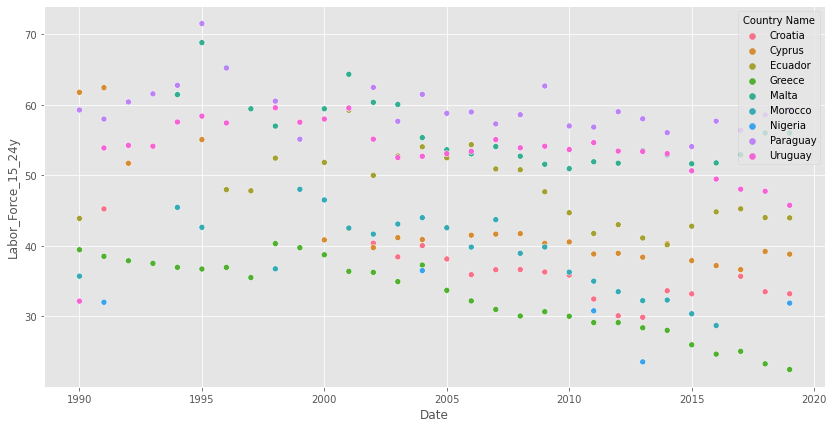

In [49]:
# Labor_Force_15_24y
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Labor_Force_15_24y'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Labor_Force_Advanced_Education'>

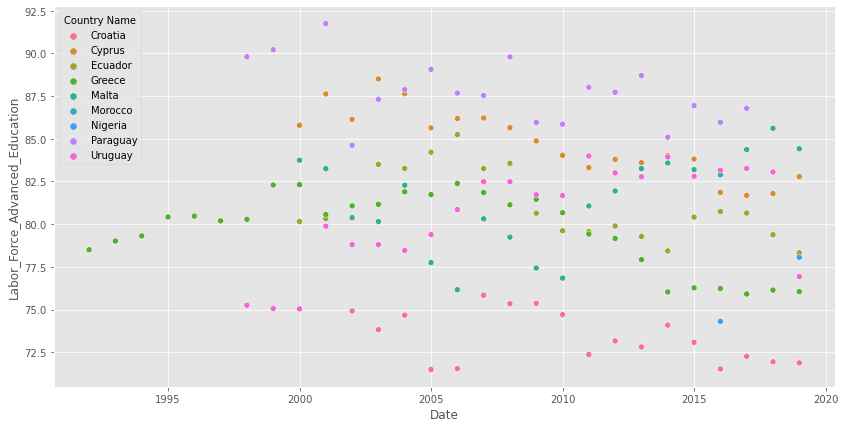

In [50]:
# Labor_Force_Advanced_Education
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Labor_Force_Advanced_Education'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Unemployment_Advanced_Education'>

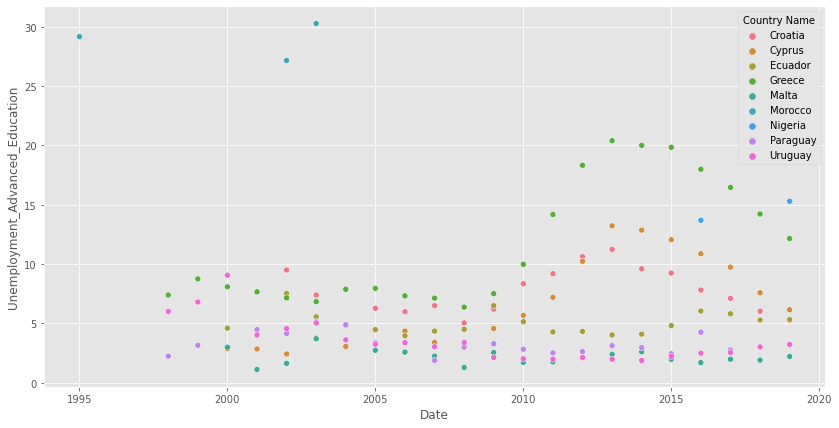

In [51]:
# Unemployment_Advanced_Education
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Unemployment_Advanced_Education'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Unemployment_Basic_Education'>

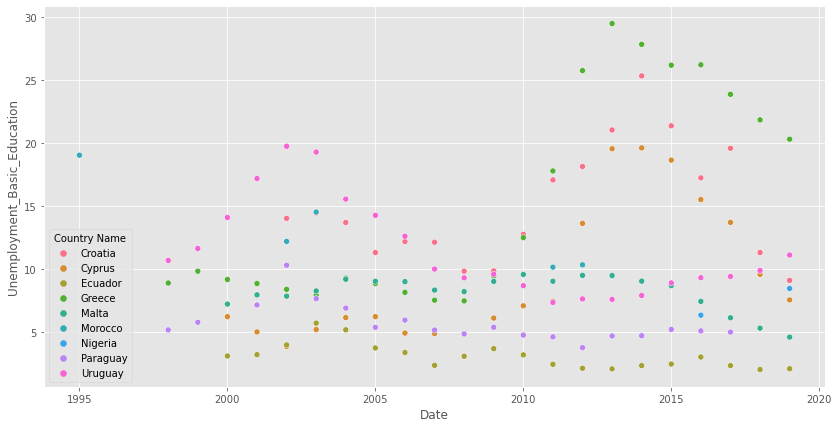

In [52]:
# Unemployment_Basic_Education
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Unemployment_Basic_Education'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Unemployment_Intermediate_Education'>

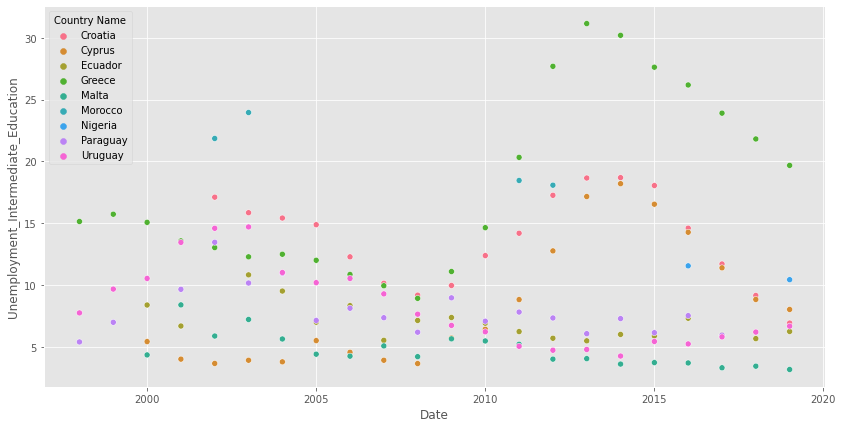

In [53]:
# Unemployment_Intermediate_Education
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Unemployment_Intermediate_Education'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Unemployment_total'>

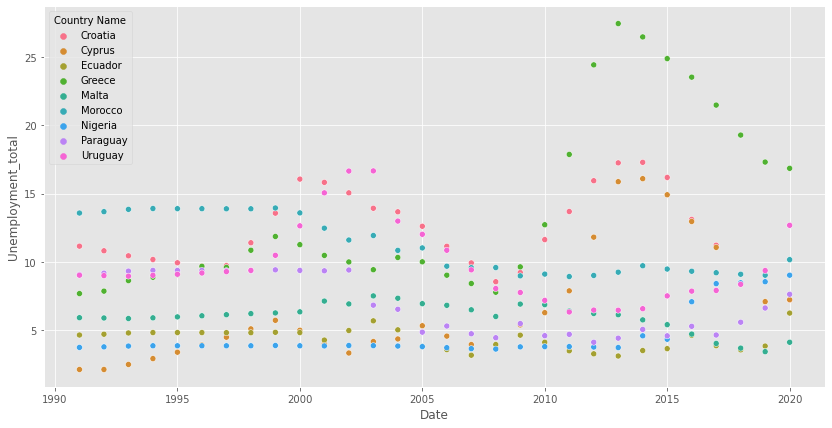

In [54]:
# Unemployment_total
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Unemployment_total'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Life_Expectancy'>

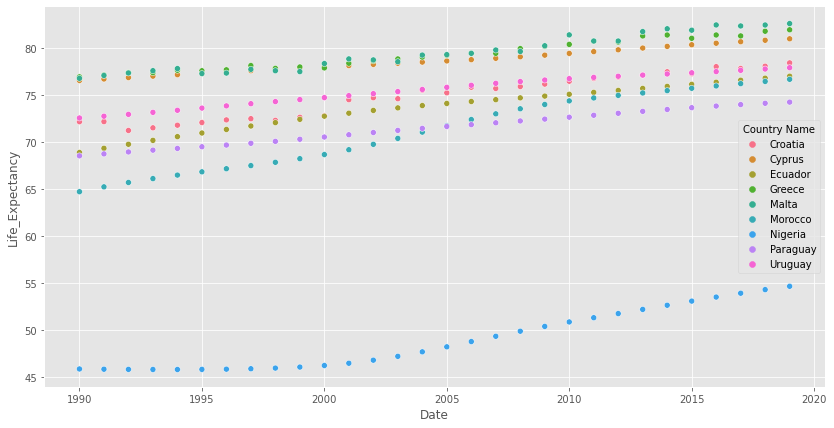

In [55]:
# Life_Expectancy
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Life_Expectancy'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='High-tech_manuf_exports'>

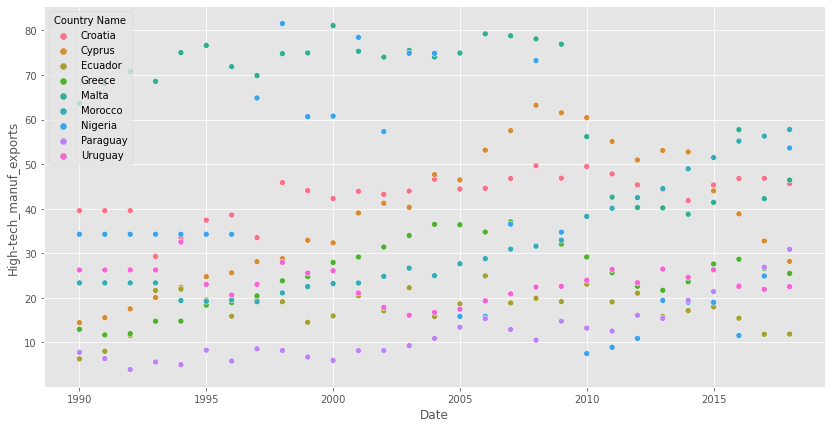

In [56]:
# High-tech_manuf_exports
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['High-tech_manuf_exports'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Adult_literacy'>

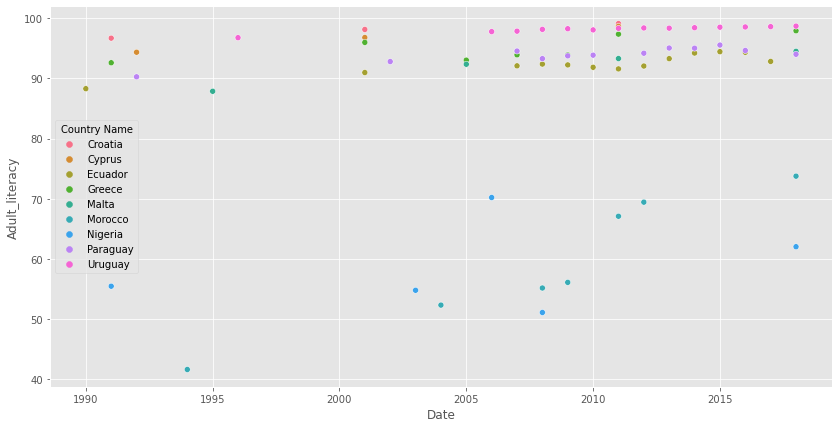

In [57]:
# Adult_literacy
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Adult_literacy'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Current_Education_Expenditure_tot'>

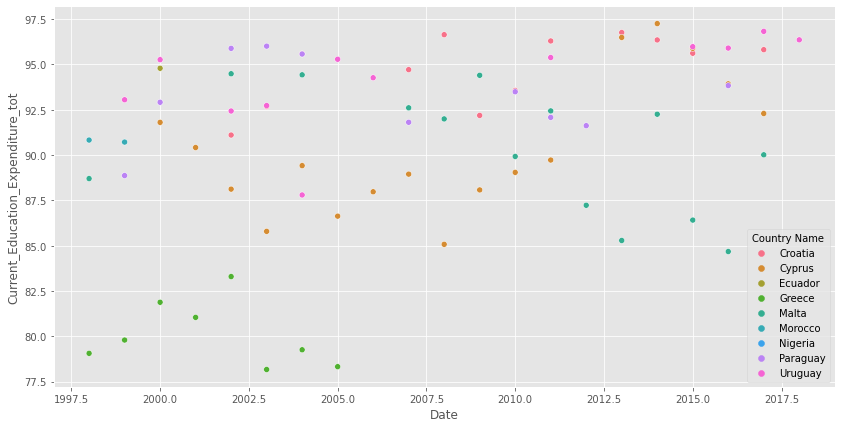

In [58]:
# Current_Education_Expenditure_tot
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Current_Education_Expenditure_tot'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Mortality_rate'>

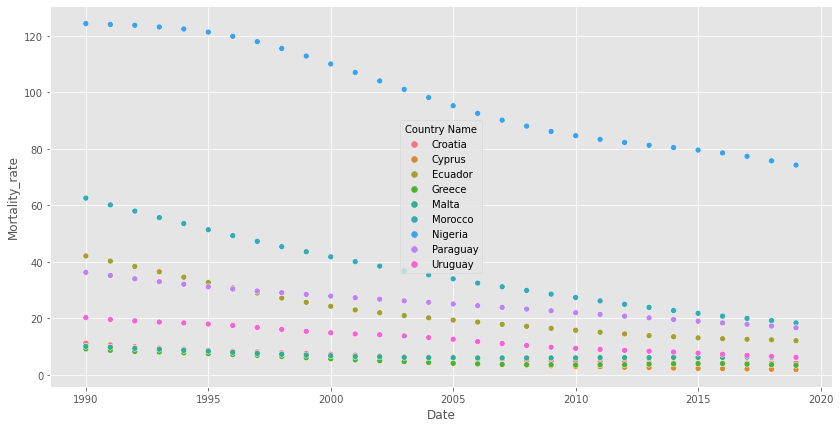

In [59]:
# Mortality_rate
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Mortality_rate'], hue=data_fin90['Country Name'])

<AxesSubplot:xlabel='Date', ylabel='Physicians'>

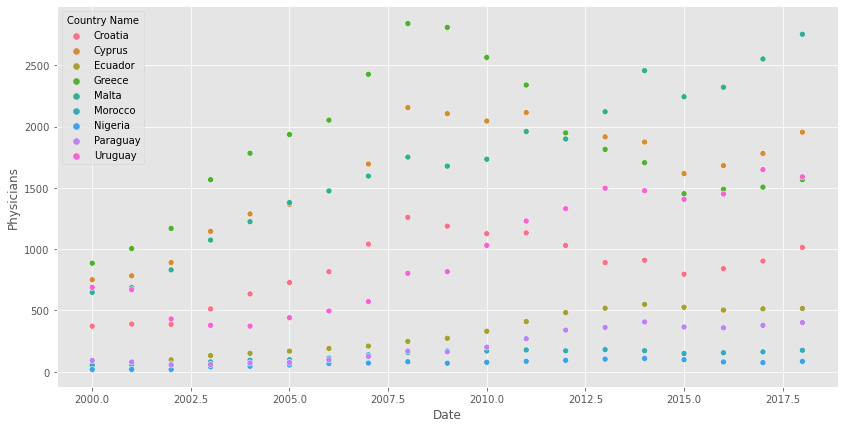

In [60]:
# Physicians
plt.figure(figsize=(14,7))
sns.scatterplot(x=data_fin90['Date'], y=data_fin90['Physicians'], hue=data_fin90['Country Name'])

As per the above visualisations the most important factors providing infomration are:
- GDP

- Health_Expenditure
- Government_Health_Expenditure
- Private_Health_Expenditure
- Physicians

- Unemployment_Advanced_Education
- Unemployment_Basic_Education
- Unemployment_Intermediate_Education
- Unemployment_total


### Correlation Matrix

In [61]:
corr = data_fin90.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

As per the above correlation matrix the most important factors impacting on the GDP are:
- Physicians
- Health_expenditure
- Government_Health_Expenditure
- Pricate_Health_Expenditure
- Salaried_Workers
- Life_Expectancy

#### Check for Missing Data at 'GDP' feature

In [62]:
# Check for missing perios in the GDP
for country in data_fin90['Country Name']:
    df = data_fin90[data_fin90['Country Name'] == country]
    if df.shape[0] < 8:
        print(country + ': ' + 'has more that 3 years of missing data')

No missing data for the GDP in the selected countries from 1981 till now a days.

#### Plot the GDP per Country

In [63]:
yearsFilter = [
               2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
              ]
width = 0.05
years = years = np.array(yearsFilter)

In [64]:
# Create Data_plot
data_plt = data_fin90[((data_fin90['Date'] > 2009) & (data_fin90['Date'] < 2020))]

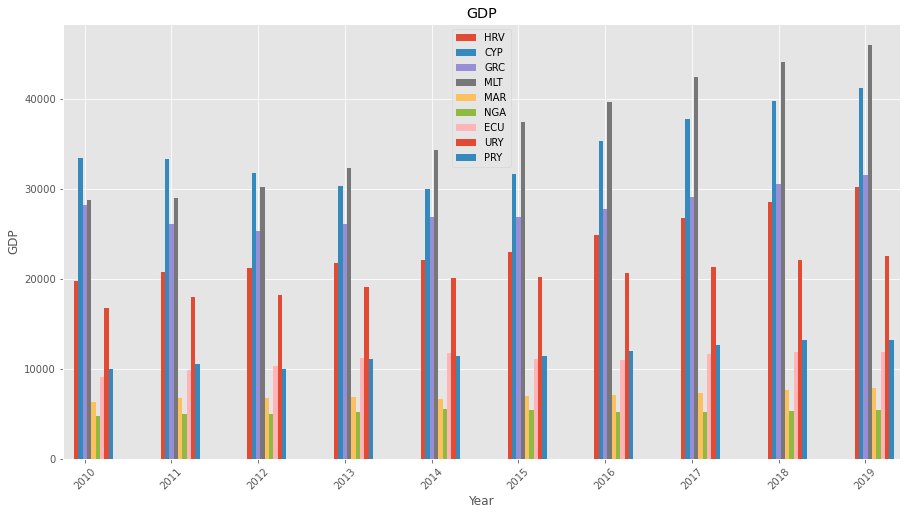

In [65]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['GDP'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['GDP'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['GDP'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['GDP'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['GDP'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['GDP'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['GDP'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['GDP'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['GDP'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('GDP')
#label the figure
ax.set_title('GDP')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

### Unemployment

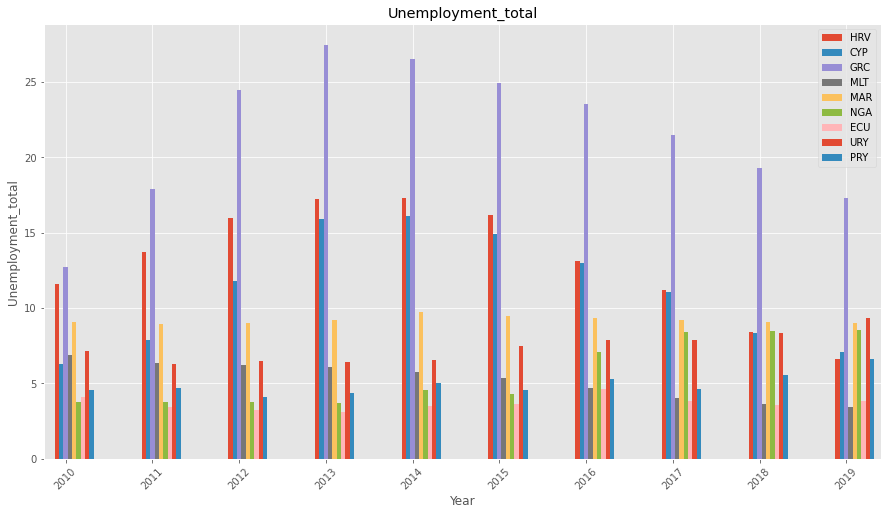

In [66]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Unemployment_total'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Unemployment_total'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Unemployment_total'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Unemployment_total'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Unemployment_total'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Unemployment_total'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Unemployment_total'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Unemployment_total'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Unemployment_total'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Unemployment_total')
#label the figure
ax.set_title('Unemployment_total')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

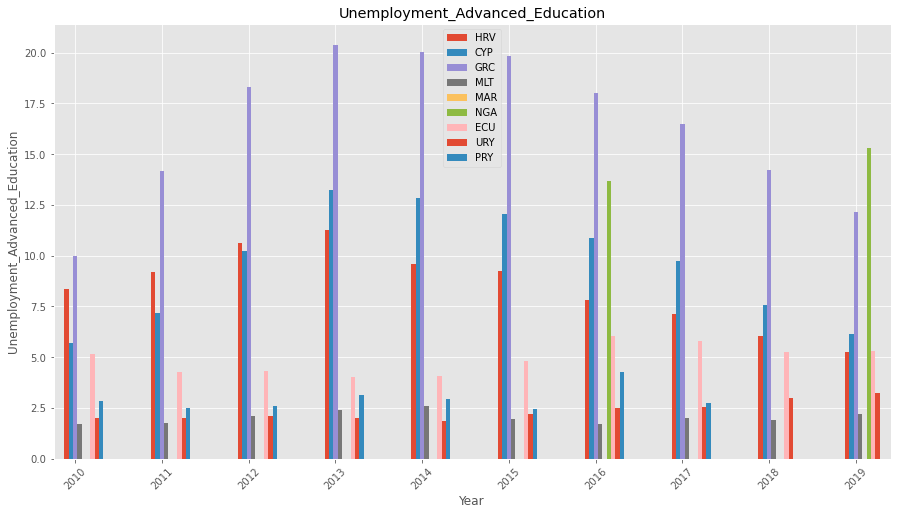

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Unemployment_Advanced_Education'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Unemployment_Advanced_Education'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Unemployment_Advanced_Education'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Unemployment_Advanced_Education'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Unemployment_Advanced_Education'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Unemployment_Advanced_Education'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Unemployment_Advanced_Education'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Unemployment_Advanced_Education'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Unemployment_Advanced_Education'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Unemployment_Advanced_Education')
#label the figure
ax.set_title('Unemployment_Advanced_Education')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

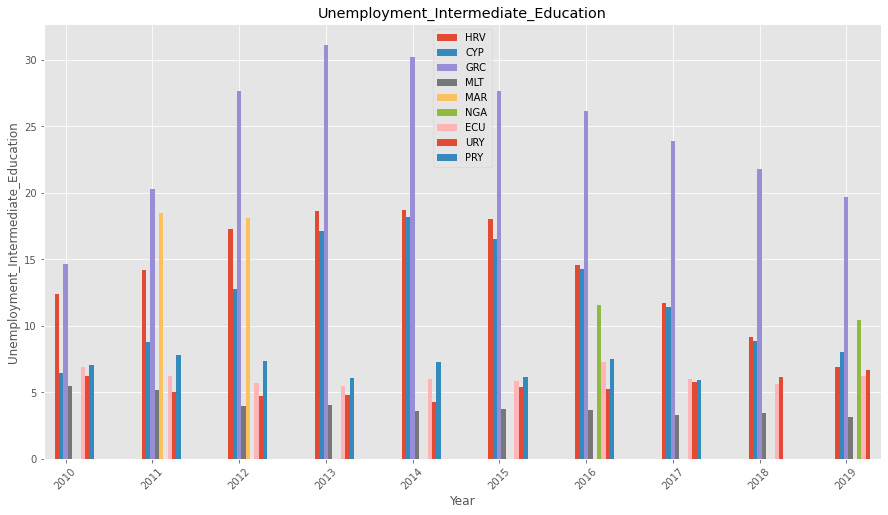

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Unemployment_Intermediate_Education'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Unemployment_Intermediate_Education'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Unemployment_Intermediate_Education'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Unemployment_Intermediate_Education'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Unemployment_Intermediate_Education'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Unemployment_Intermediate_Education'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Unemployment_Intermediate_Education'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Unemployment_Intermediate_Education'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Unemployment_Intermediate_Education'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Unemployment_Intermediate_Education')
#label the figure
ax.set_title('Unemployment_Intermediate_Education')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

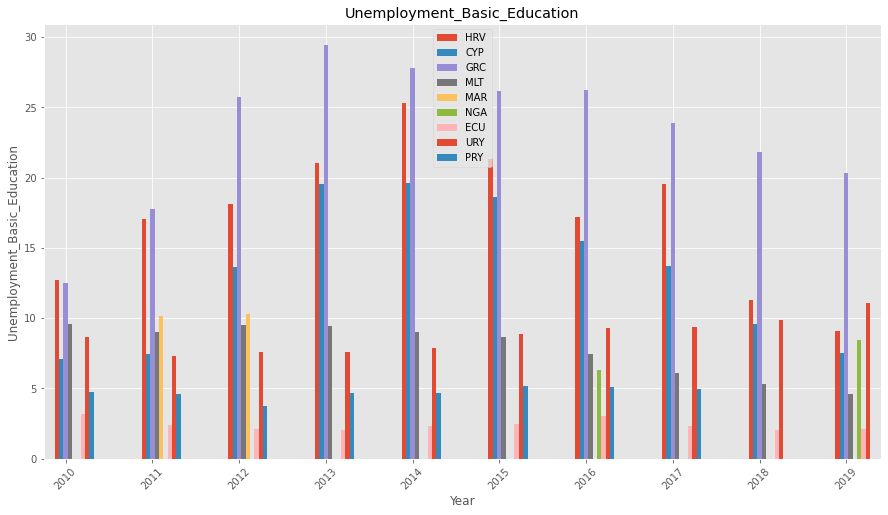

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Unemployment_Basic_Education'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Unemployment_Basic_Education'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Unemployment_Basic_Education'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Unemployment_Basic_Education'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Unemployment_Basic_Education'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Unemployment_Basic_Education'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Unemployment_Basic_Education'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Unemployment_Basic_Education'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Unemployment_Basic_Education'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Unemployment_Basic_Education')
#label the figure
ax.set_title('Unemployment_Basic_Education')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

### Health

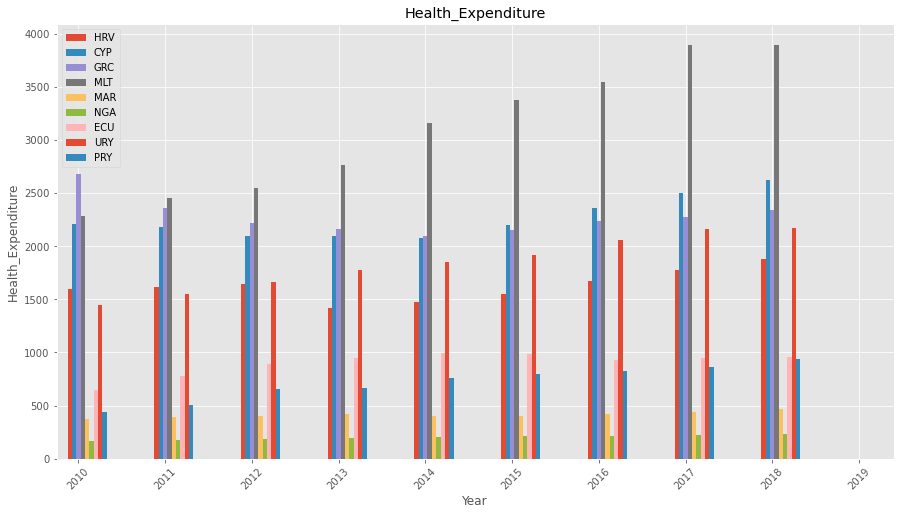

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Health_Expenditure'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Health_Expenditure'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Health_Expenditure'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Health_Expenditure'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Health_Expenditure'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Health_Expenditure'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Health_Expenditure'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Health_Expenditure'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Health_Expenditure'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Health_Expenditure')
#label the figure
ax.set_title('Health_Expenditure')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

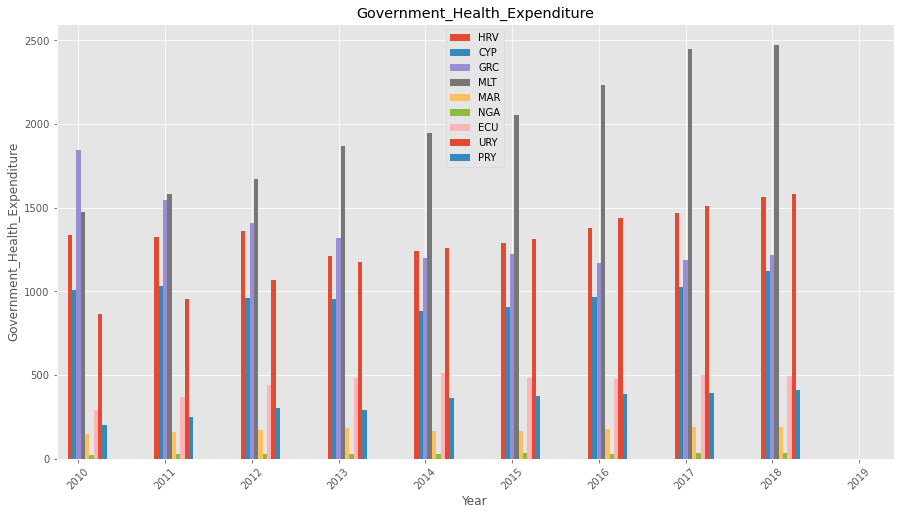

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Government_Health_Expenditure'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Government_Health_Expenditure'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Government_Health_Expenditure'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Government_Health_Expenditure'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Government_Health_Expenditure'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Government_Health_Expenditure'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Government_Health_Expenditure'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Government_Health_Expenditure'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Government_Health_Expenditure'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Government_Health_Expenditure')
#label the figure
ax.set_title('Government_Health_Expenditure')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

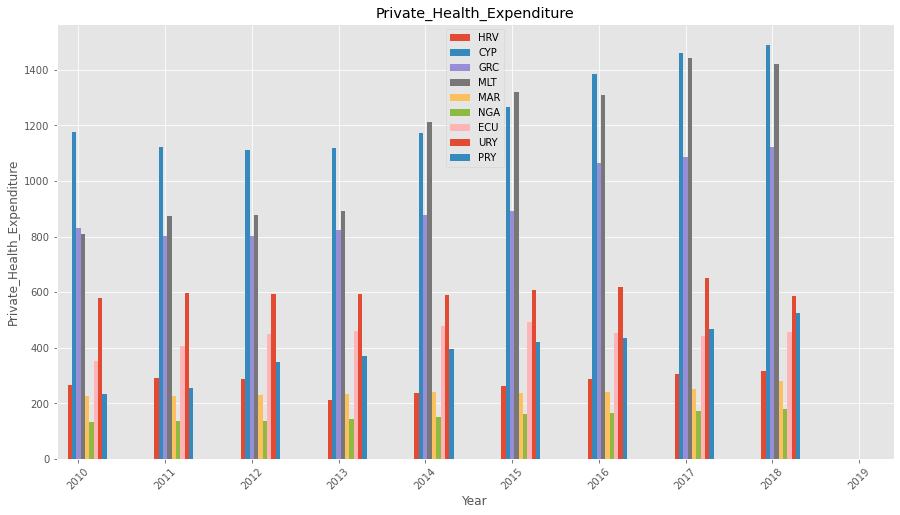

In [72]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Private_Health_Expenditure'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Private_Health_Expenditure'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Private_Health_Expenditure'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Private_Health_Expenditure'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Private_Health_Expenditure'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Private_Health_Expenditure'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Private_Health_Expenditure'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Private_Health_Expenditure'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Private_Health_Expenditure'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Private_Health_Expenditure')
#label the figure
ax.set_title('Private_Health_Expenditure')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

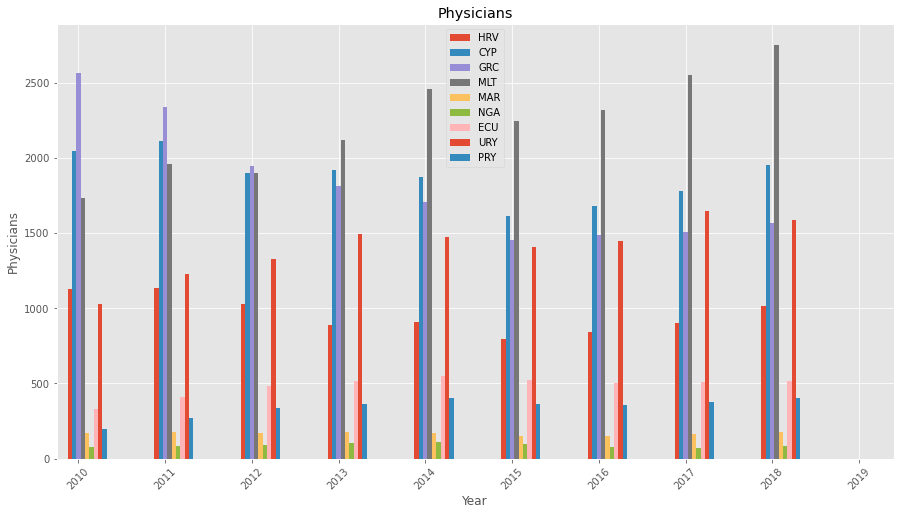

In [73]:
fig, ax = plt.subplots(figsize=(15, 8))

plt_HRV = ax.bar(years,data_plt[data_plt['Country Name'] == 'Croatia']['Physicians'].values, width)
plt_CYP = ax.bar(years + width,data_plt[data_plt['Country Name'] == 'Cyprus']['Physicians'].values, width)
plt_GRC = ax.bar(years + 2*width,data_plt[data_plt['Country Name'] == 'Greece']['Physicians'].values, width)
plt_MLT = ax.bar(years + 3*width,data_plt[data_plt['Country Name'] == 'Malta']['Physicians'].values, width)
plt_MAR = ax.bar(years + 4*width,data_plt[data_plt['Country Name'] == 'Morocco']['Physicians'].values, width)
plt_NGA = ax.bar(years + 5*width,data_plt[data_plt['Country Name'] == 'Nigeria']['Physicians'].values, width)
plt_ECU = ax.bar(years + 6*width,data_plt[data_plt['Country Name'] == 'Ecuador']['Physicians'].values, width)
plt_URY = ax.bar(years + 7*width,data_plt[data_plt['Country Name'] == 'Uruguay']['Physicians'].values, width)
plt_PRY = ax.bar(years + 8*width,data_plt[data_plt['Country Name'] == 'Paraguay']['Physicians'].values, width)


# Axes and Labels
ax.set_xlim(years[0]-3*width, years[len(years)-1]+10*width)
ax.set_xlabel('Year')
ax.set_xticks(years+2*width)
xtickNames = ax.set_xticklabels(years)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.set_ylabel('Physicians')
#label the figure
ax.set_title('Physicians')
ax.legend((plt_HRV[0], plt_CYP[0], plt_GRC[0], plt_MLT[0], plt_MAR[0], plt_NGA[0], 
          plt_ECU[0], plt_URY[0], plt_PRY[0]),
          ('HRV', 'CYP', 'GRC', 'MLT', 'MAR', 'NGA', 'ECU', 'URY', 'PRY'))
plt.show()

In [74]:
# Corelation Matrix
# np.corrcoef(data_plt['GDP'],data_plt['Unemplyment_total'])

In [75]:
data_plt.columns

Index(['Country Name', 'Date', 'Region', 'GDP', 'Adult_literacy',
       'Current_Education_Expenditure_tot', 'Hospital_Beds', 'Physicians',
       'Health_Expenditure', 'Government_Health_Expenditure',
       'Private_Health_Expenditure', 'Salaried_Workers', 'Labor_Force_15_24y',
       'Labor_Force_Advanced_Education', 'Unemployment_Advanced_Education',
       'Unemployment_Basic_Education', 'Unemployment_Intermediate_Education',
       'Unemployment_total', 'Mortality_rate', 'Life_Expectancy',
       'High-tech_manuf_exports'],
      dtype='object')

### Plot Indicators based on coutries in same region:

    1) Croatia		- Europe & Central Asia       - High income
    1) Cyprus	 	- Europe & Central Asia       - High income
    1) Greece	 	- Europe & Central Asia       - High income
    
    2) Malta	  	- Middle East & North Africa  - High income
    2) Morocco		- Middle East & North Africa  - Lower middle income
    2) Nigeria		- Middle East & North Africa  - Upper middle income
    
    3) Ecuador		- Latin America & Caribbean   - Upper middle income
    3) Uruguay		- Latin America & Caribbean   - High income
    3) Paraguay   	- Latin America & Caribbean   - Lower middle income

In [170]:
def plot_indicator2(dds,ln1,ln2,indicator,filt,delta=10):
    
    ds1 = dds[dds[filt]==ln1]
    try:
        title = ln1 + ' vs ' + ln2 + ' per ' + indicator
    except:
        title = "None"
    #Dataset - 1
    xds1 = ds1['Date'].values
    yds1 = ds1[indicator].values
    
    #Dataset - 2
    ds2 = dds[dds[filt]==ln2]
    xds2 = ds2['Date'].values
    yds2 = ds2[indicator].values
    
    
    #Plot
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(xds1,yds1,label=ln1)
    plt.plot(xds2,yds2,label=ln2)
    plt.title(title)
    plt.legend(loc=2)


In [171]:
def plot_indicator3(dds,ln1,ln2,ln3,indicator,filt,delta=10):
    
    ds1 = dds[dds[filt]==ln1]
    try:
        title = ln1 + ' vs ' + ln2 + ' vs ' + ln3 + ' per ' + indicator
    except:
        title = "None"
    #Dataset - 1
    xds1 = ds1['Date'].values
    yds1 = ds1[indicator].values
    
    #Dataset - 2
    ds2 = dds[dds[filt]==ln2]
    xds2 = ds2['Date'].values
    yds2 = ds2[indicator].values

    #Dataset - 3
    ds3 = dds[dds[filt]==ln3]
    xds3 = ds3['Date'].values
    yds3 = ds3[indicator].values
    
    #Plot
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(xds1,yds1,label=ln1)
    plt.plot(xds2,yds2,label=ln2)
    plt.plot(xds3,yds3,label=ln3)
    plt.title(title)
    plt.legend(loc=2)

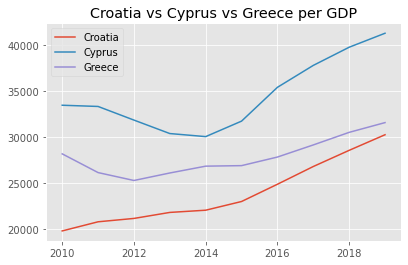

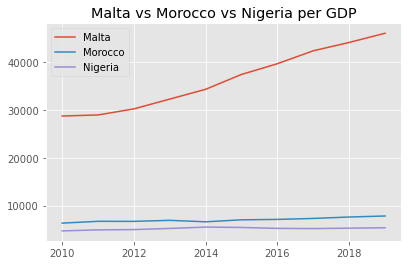

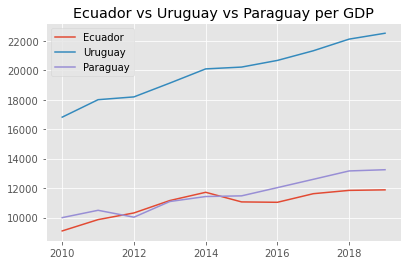

In [172]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','GDP','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','GDP','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','GDP','Country Name',delta=10)

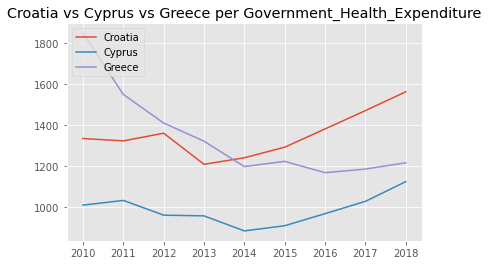

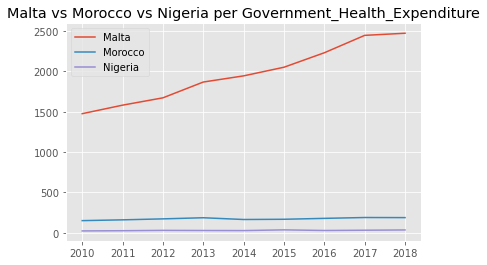

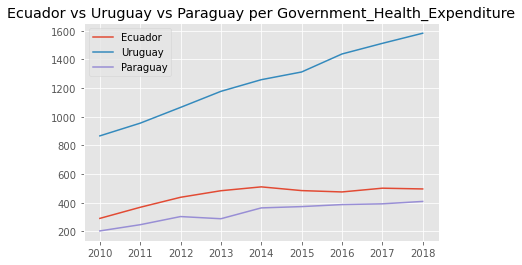

In [129]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Government_Health_Expenditure','Country Name',delta=10)

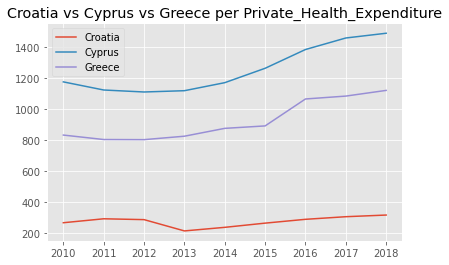

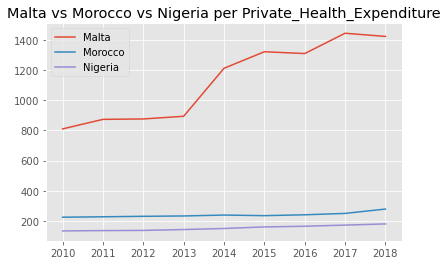

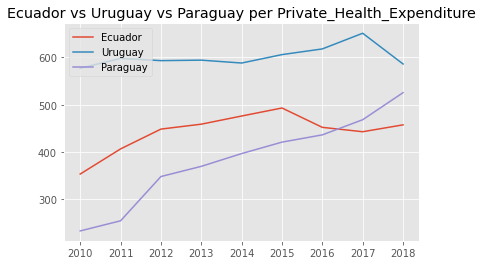

In [130]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Private_Health_Expenditure','Country Name',delta=10)

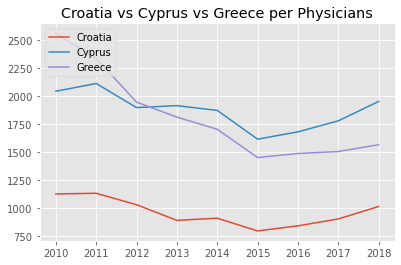

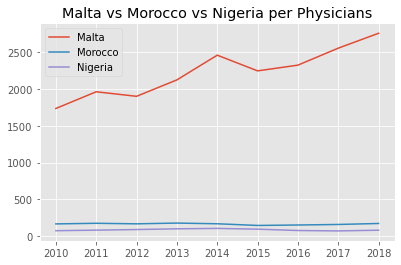

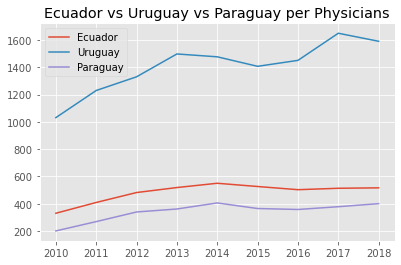

In [132]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Physicians','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Physicians','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Physicians','Country Name',delta=10)

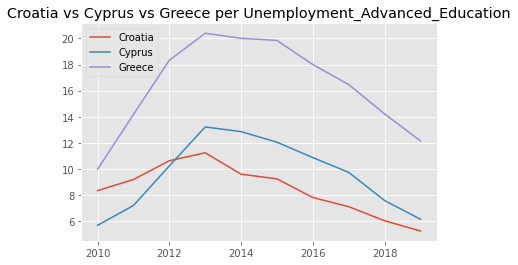

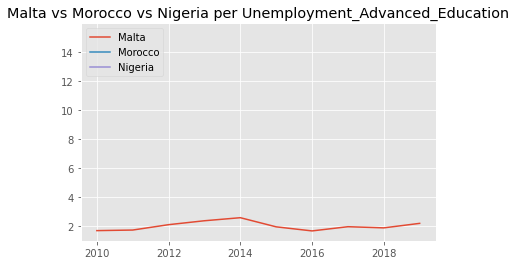

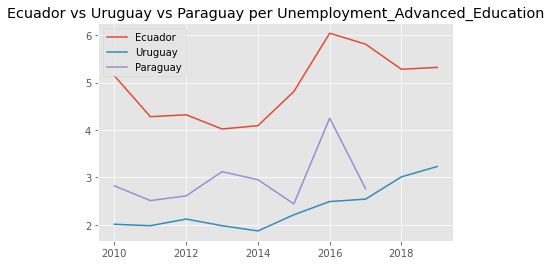

In [133]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Unemployment_Advanced_Education','Country Name',delta=10)

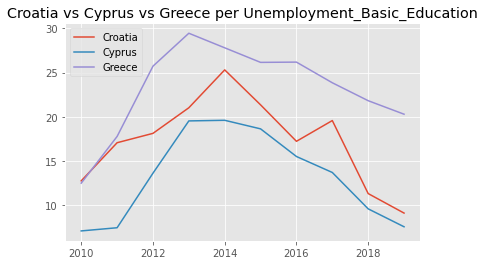

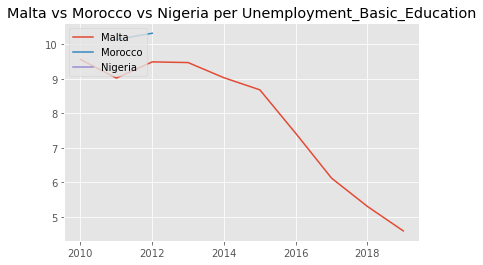

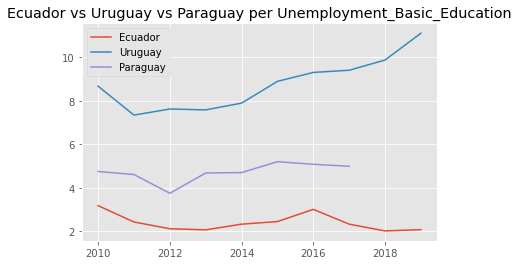

In [134]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Unemployment_Basic_Education','Country Name',delta=10)

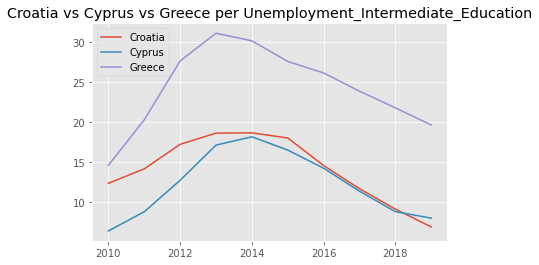

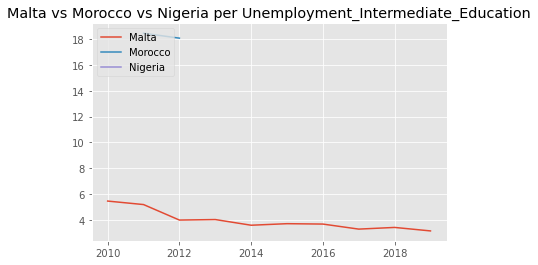

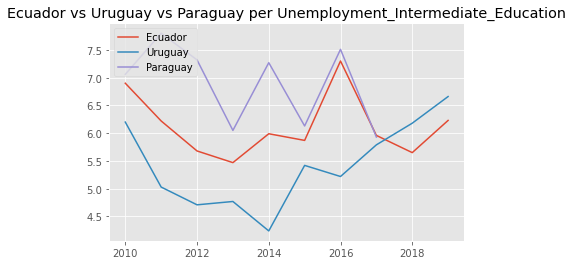

In [145]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Unemployment_Intermediate_Education','Country Name',delta=10)

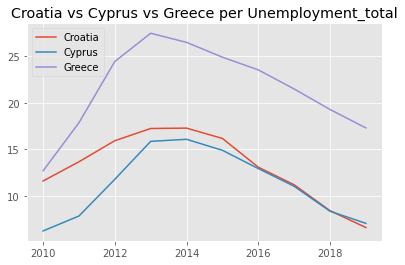

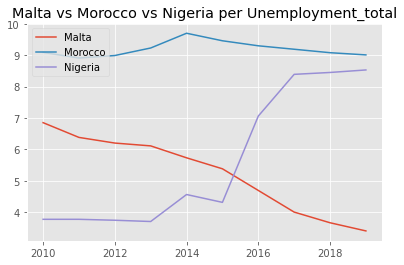

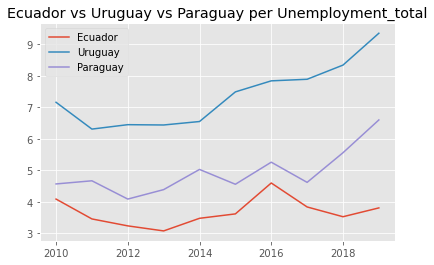

In [173]:
plot_indicator3(data_plt,'Croatia','Cyprus','Greece','Unemployment_total','Country Name',delta=10)
plot_indicator3(data_plt,'Malta','Morocco','Nigeria','Unemployment_total','Country Name',delta=10)
plot_indicator3(data_plt,'Ecuador','Uruguay','Paraguay','Unemployment_total','Country Name',delta=10)

In [138]:
data_plt.columns

Index(['Country Name', 'Date', 'Region', 'GDP', 'Adult_literacy',
       'Current_Education_Expenditure_tot', 'Hospital_Beds', 'Physicians',
       'Health_Expenditure', 'Government_Health_Expenditure',
       'Private_Health_Expenditure', 'Salaried_Workers', 'Labor_Force_15_24y',
       'Labor_Force_Advanced_Education', 'Unemployment_Advanced_Education',
       'Unemployment_Basic_Education', 'Unemployment_Intermediate_Education',
       'Unemployment_total', 'Mortality_rate', 'Life_Expectancy',
       'High-tech_manuf_exports'],
      dtype='object')

### HDI - Human Development Index

The human development data are sourced from international data agencies with the mandate, resources, and expertise to collect national data on specific indicators unless otherwise noted.

Definition: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. See Technical note 1 at http://hdr.undp.org/sites/default/files/hdr2020_technical_notes.pdf for details on how the HDI is calculated.

Source: HDRO calculations based on data from UNDESA (2019a), UNESCO Institute for Statistics (2020), United Nations Statistics Division (2020b), World Bank (2020a), Barro and Lee (2018) and IMF (2020).

In [162]:
#Read in the data from the project directory; the data is represented as a table, here refered to as dataframe
dhi = pd.read_csv(os.path.join(projpath, r"Human Development Index_HDI.csv"))

In [184]:
dhi.head()

HDI Rank      Country   1990   1991   1992   1993   1994   1995   1996  \
0      169  Afghanistan  0.302  0.307  0.316  0.312  0.307  0.331  0.335   
1       69      Albania  0.650  0.631  0.615  0.618  0.624  0.637  0.646   
2       91      Algeria  0.572  0.576  0.582  0.586  0.590  0.595  0.602   
3       36      Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4      148       Angola    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    1997  ...   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  0.339  ...  0.472  0.477  0.489  0.496  0.500  0.500  0.502  0.506  0.509   
1  0.645  ...  0.745  0.764  0.775  0.782  0.787  0.788  0.788  0.790  0.792   
2  0.611  ...  0.721  0.728  0.728  0.729  0.736  0.740  0.743  0.745  0.746   
3    NaN  ...  0.837  0.836  0.858  0.856  0.863  0.862  0.866  0.863  0.867   
4    NaN  ...  0.517  0.533  0.544  0.555  0.565  0.572  0.578  0.582  0.582   

    2019  
0  0.511  
1  0.795  
2  0.748  
3  0.868  
4  0.581  

[5 rows x 32 columns]

In [185]:
dhi_tr = (dhi.set_index(['HDI Rank', 'Country'])
         .stack()
         .reset_index(name='Value')
         .rename(columns={'level_2':'Date'}))

In [186]:
dhi_tr.shape

(5602, 4)

In [187]:
dhi_tr.head()

HDI Rank      Country  Date  Value
0      169  Afghanistan  1990  0.302
1      169  Afghanistan  1991  0.307
2      169  Afghanistan  1992  0.316
3      169  Afghanistan  1993  0.312
4      169  Afghanistan  1994  0.307

In [188]:
dhi_tr_flt = dhi_tr[((dhi_tr['Country'] == 'Croatia') | (dhi_tr['Country'] == 'Cyprus') | 
                   (dhi_tr['Country'] == 'Greece') | (dhi_tr['Country'] == 'Malta') | 
                   (dhi_tr['Country'] == 'Morocco') | (dhi_tr['Country'] == 'Ecuador') | 
                   (dhi_tr['Country'] == 'Paraguay') | (dhi_tr['Country'] == 'Uruguay') | 
                   (dhi_tr['Country'] == 'Nigeria')
                  )]

In [189]:
dhi_tr_flt.shape

(257, 4)

In [190]:
dhi_tr_flt.head()

HDI Rank  Country  Date  Value
1111       43  Croatia  1990  0.677
1112       43  Croatia  1991  0.672
1113       43  Croatia  1992  0.672
1114       43  Croatia  1993  0.674
1115       43  Croatia  1994  0.688

In [191]:
dhi_tr_flt['Date'] = dhi_tr_flt['Date'].astype(int)

<ipython-input-191-a98b4d50da71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhi_tr_flt['Date'] = dhi_tr_flt['Date'].astype(int)


In [192]:
# Let's check the situation for in the last 40 years
dhi_tr_flt90 = dhi_tr_flt[(dhi_tr_flt['Date'] > 1989)]

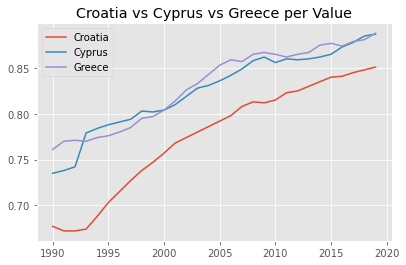

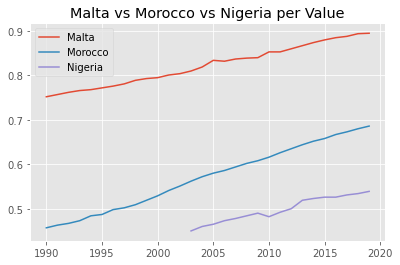

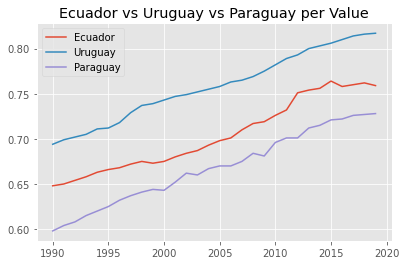

In [193]:
plot_indicator3(dhi_tr_flt,'Croatia','Cyprus','Greece','Value','Country',delta=10)
plot_indicator3(dhi_tr_flt,'Malta','Morocco','Nigeria','Value','Country',delta=10)
plot_indicator3(dhi_tr_flt,'Ecuador','Uruguay','Paraguay','Value','Country',delta=10)

## Group the HDI and Main dataset

In [272]:
dhi_tr_flt.head(3)

HDI Rank  Country  Date  Value
1111       43  Croatia  1990  0.677
1112       43  Croatia  1991  0.672
1113       43  Croatia  1992  0.672

In [276]:
data_plt.shape

(90, 22)

In [275]:
data_plt.head(3)

Country Name  Date                 Region           GDP  Adult_literacy  \
50      Croatia  2010  Europe & Central Asia  19814.601971             NaN   
51      Croatia  2011  Europe & Central Asia  20804.388883       99.125359   
52      Croatia  2012  Europe & Central Asia  21168.851231             NaN   

    Current_Education_Expenditure_tot  Hospital_Beds   Physicians  \
50                          93.551270           5.78  1126.373657   
51                          96.285713           5.84  1132.498901   
52                                NaN           5.89  1029.971191   

    Health_Expenditure  Government_Health_Expenditure  ...  \
50         1598.638184                    1333.408325  ...   
51         1612.717896                    1321.966064  ...   
52         1644.482666                    1359.201172  ...   

    Labor_Force_15_24y  Labor_Force_Advanced_Education  \
50           35.849998                       74.699997   
51           32.459999                       72.370003   
52           30.090000                       73.160004   

    Unemployment_Advanced_Education  Unemployment_Basic_Education  \
50                             8.34                     12.740000   
51                             9.19                     17.059999   
52                            10.63                     18.120001   

    Unemployment_Intermediate_Education  Unemployment_total  Mortality_rate  \
50                                12.37               11.62             4.7   
51                                14.18               13.68             4.5   
52                                17.25               15.94             4.4   

    Life_Expectancy  High-tech_manuf_exports  GDP_Region_Avg  
50         76.47561                49.457552             NaN  
51         76.77561                47.798200             NaN  
52         76.92439                45.332249             NaN  

[3 rows x 22 columns]

In [277]:
data_plt = pd.merge(data_plt, dhi_tr_flt, how='left', left_on=['Country Name', 'Date'], right_on = ['Country','Date'])

In [283]:
# Drop these 2 columns as they are not used 'HDI Rank' and 'Country'
data_plt = data_plt.drop(columns=['HDI Rank', 'Country'])

In [284]:
# Rename the Value feature with 'HDI'
data_plt = data_plt.rename(columns={"Value":"HDI"})

In [285]:
data_plt.shape

(90, 23)

In [286]:
data_plt

Country Name  Date                      Region           GDP  \
0       Croatia  2010       Europe & Central Asia  19814.601971   
1       Croatia  2011       Europe & Central Asia  20804.388883   
2       Croatia  2012       Europe & Central Asia  21168.851231   
3       Croatia  2013       Europe & Central Asia  21820.520519   
4       Croatia  2014       Europe & Central Asia  22060.741131   
5       Croatia  2015       Europe & Central Asia  23005.101142   
6       Croatia  2016       Europe & Central Asia  24876.309669   
7       Croatia  2017       Europe & Central Asia  26800.081592   
8       Croatia  2018       Europe & Central Asia  28554.383511   
9       Croatia  2019       Europe & Central Asia  30246.049304   
10       Cyprus  2010       Europe & Central Asia  33445.906489   
11       Cyprus  2011       Europe & Central Asia  33313.579149   
12       Cyprus  2012       Europe & Central Asia  31834.676363   
13       Cyprus  2013       Europe & Central Asia  30375.106316   
14       Cyprus  2014       Europe & Central Asia  30042.827106   
15       Cyprus  2015       Europe & Central Asia  31722.216208   
16       Cyprus  2016       Europe & Central Asia  35388.832526   
17       Cyprus  2017       Europe & Central Asia  37766.901657   
18       Cyprus  2018       Europe & Central Asia  39737.325187   
19       Cyprus  2019       Europe & Central Asia  41254.404588   
20      Ecuador  2010   Latin America & Caribbean   9090.308233   
21      Ecuador  2011   Latin America & Caribbean   9857.521816   
22      Ecuador  2012   Latin America & Caribbean  10311.402598   
23      Ecuador  2013   Latin America & Caribbean  11153.684502   
24      Ecuador  2014   Latin America & Caribbean  11713.171502   
25      Ecuador  2015   Latin America & Caribbean  11060.287633   
26      Ecuador  2016   Latin America & Caribbean  11034.269848   
27      Ecuador  2017   Latin America & Caribbean  11617.908758   
28      Ecuador  2018   Latin America & Caribbean  11843.393637   
29      Ecuador  2019   Latin America & Caribbean  11878.718364   
30       Greece  2010       Europe & Central Asia  28172.145193   
31       Greece  2011       Europe & Central Asia  26141.319554   
32       Greece  2012       Europe & Central Asia  25284.464090   
33       Greece  2013       Europe & Central Asia  26097.871858   
34       Greece  2014       Europe & Central Asia  26838.455168   
35       Greece  2015       Europe & Central Asia  26895.325651   
36       Greece  2016       Europe & Central Asia  27826.150940   
37       Greece  2017       Europe & Central Asia  29140.763532   
38       Greece  2018       Europe & Central Asia  30504.403616   
39       Greece  2019       Europe & Central Asia  31562.593772   
40        Malta  2010  Middle East & North Africa  28744.700292   
41        Malta  2011  Middle East & North Africa  28973.195599   
42        Malta  2012  Middle East & North Africa  30243.987802   
43        Malta  2013  Middle East & North Africa  32295.878732   
44        Malta  2014  Middle East & North Africa  34344.111631   
45        Malta  2015  Middle East & North Africa  37455.070423   
46        Malta  2016  Middle East & North Africa  39695.399155   
47        Malta  2017  Middle East & North Africa  42404.332748   
48        Malta  2018  Middle East & North Africa  44141.305527   
49        Malta  2019  Middle East & North Africa  46071.333151   
50      Morocco  2010  Middle East & North Africa   6332.123545   
51      Morocco  2011  Middle East & North Africa   6712.326003   
52      Morocco  2012  Middle East & North Africa   6702.418324   
53      Morocco  2013  Middle East & North Africa   6916.015457   
54      Morocco  2014  Middle East & North Africa   6609.609108   
55      Morocco  2015  Middle East & North Africa   7024.963089   
56      Morocco  2016  Middle East & North Africa   7112.999215   
57      Morocco  2017  Middle East & North Africa   7314.154487   
58      Morocco  2018  Middle East & North Africa 

#### Create a new dataset for a group Region and merge it to original dataset

In [291]:
# data_plt.head()

In [292]:
# data_plt.groupby('Region').agg({'GDP': ['mean', 'max', 'min']})

In [242]:
data_plt.dtypes

Country Name                            object
Date                                    object
Region                                  object
GDP                                    float64
Adult_literacy                         float64
Current_Education_Expenditure_tot      float64
Hospital_Beds                          float64
Physicians                             float64
Health_Expenditure                     float64
Government_Health_Expenditure          float64
Private_Health_Expenditure             float64
Salaried_Workers                       float64
Labor_Force_15_24y                     float64
Labor_Force_Advanced_Education         float64
Unemployment_Advanced_Education        float64
Unemployment_Basic_Education           float64
Unemployment_Intermediate_Education    float64
Unemployment_total                     float64
Mortality_rate                         float64
Life_Expectancy                        float64
High-tech_manuf_exports                float64
GDP_Region_Av

In [267]:
# Change Data Types
# data_plt['GDP'] = data_plt['GDP'].astype(float)

In [288]:
# Create a new dataset called "data_plt_group" per Region
data_plt_group = data_plt.groupby(['Date', 'Region'])[['GDP',
                                                       'Health_Expenditure', 'Government_Health_Expenditure',
                                                       'Private_Health_Expenditure', 'Physicians',
                                                       'Unemployment_Advanced_Education', 'Unemployment_Basic_Education',
                                                       'Unemployment_Intermediate_Education', 'Unemployment_total', 'HDI'
                                                      ]].mean()

In [289]:
data_plt_group.reset_index(inplace=True)

In [298]:
# Rename column names
data_plt_group.columns = ['Date',
                    'Region',
                    'region_GDP',
                    'region_Health_Expenditure',
                    'region_Government_Health_Expenditure',
                    'region_Private_Health_Expenditure', 
                    'region_Physicians',
                    'region_Unemployment_Advanced_Education', 
                    'region_Unemployment_Basic_Education',
                    'region_Unemployment_Intermediate_Education', 
                    'region_Unemployment_total', 
                    'region_HDI'
                   ]

In [299]:
data_plt_group.head()

Date                      Region    region_GDP  region_Health_Expenditure  \
0  2010       Europe & Central Asia  27144.217884                2161.106120   
1  2010   Latin America & Caribbean  11966.803414                 844.985260   
2  2010  Middle East & North Africa  13260.009615                 943.231338   
3  2011       Europe & Central Asia  26753.095862                2048.604045   
4  2011   Latin America & Caribbean  12783.769477                 945.791890   

   region_Government_Health_Expenditure  region_Private_Health_Expenditure  \
0                           1396.151672                         758.161906   
1                            453.739583                         387.976863   
2                            549.808790                         389.390279   
3                           1300.654744                         739.546173   
4                            523.567047                         419.688812   

   region_Physicians  region_Unemployment_Advanced_Education  \
0        1912.011963                                8.000000   
1         520.428848                                3.323333   
2         659.811841                                1.710000   
3        1862.027873                               10.190000   
4         635.756714                                2.923333   

   region_Unemployment_Basic_Education  \
0                            10.763333   
1                             5.533333   
2                             9.560000   
3                            14.086667   
4                             4.793333   

   region_Unemployment_Intermediate_Education  region_Unemployment_total  \
0                                   11.136667                  10.196667   
1                                    6.720000                   5.273333   
2                                    5.460000                   6.570000   
3                                   14.436667                  13.136667   
4                                    6.350000                   4.813333   

   region_HDI  
0    0.845333  
1    0.734667  
2    0.650333  
3    0.848333  
4    0.740667

In [301]:
# Merge Original dataset with data per Region
data_plt = pd.merge(data_plt, data_plt_group, how='left', left_on=['Region', 'Date'], right_on = ['Region','Date'])

In [303]:
data_plt.head()

Country Name  Date                 Region           GDP  Adult_literacy  \
0      Croatia  2010  Europe & Central Asia  19814.601971             NaN   
1      Croatia  2011  Europe & Central Asia  20804.388883       99.125359   
2      Croatia  2012  Europe & Central Asia  21168.851231             NaN   
3      Croatia  2013  Europe & Central Asia  21820.520519             NaN   
4      Croatia  2014  Europe & Central Asia  22060.741131             NaN   

   Current_Education_Expenditure_tot  Hospital_Beds   Physicians  \
0                          93.551270           5.78  1126.373657   
1                          96.285713           5.84  1132.498901   
2                                NaN           5.89  1029.971191   
3                          96.750587           5.86   889.944519   
4                          96.341911           5.91   909.371643   

   Health_Expenditure  Government_Health_Expenditure  ...    region_GDP  \
0         1598.638184                    1333.408325  ...  27144.217884   
1         1612.717896                    1321.966064  ...  26753.095862   
2         1644.482666                    1359.201172  ...  26095.997228   
3         1420.107300                    1207.839355  ...  26097.832897   
4         1475.160645                    1239.722412  ...  26314.007802   

   region_Health_Expenditure  region_Government_Health_Expenditure  \
0                2161.106120                           1396.151672   
1                2048.604045                           1300.654744   
2                1983.547770                           1242.733968   
3                1894.523641                           1161.591654   
4                1884.399333                           1106.666992   

   region_Private_Health_Expenditure  region_Physicians  \
0                         758.161906        1912.011963   
1                         739.546173        1862.027873   
2                         733.157989        1625.863973   
3                         719.028712        1540.048482   
4                         760.978963        1496.125793   

   region_Unemployment_Advanced_Education  \
0                                8.000000   
1                               10.190000   
2                               13.063333   
3                               14.953333   
4                               14.156667   

   region_Unemployment_Basic_Education  \
0                            10.763333   
1                            14.086667   
2                            19.153333   
3                            23.336667   
4                            24.240000   

   region_Unemployment_Intermediate_Education  region_Unemployment_total  \
0                                   11.136667                  10.196667   
1                                   14.436667                  13.136667   
2                                   19.230000                  17.393333   
3                                   22.316666                  20.196666   
4                                   22.356667                  19.956667   

   region_HDI  
0    0.845333  
1    0.848333  
2    0.849667  
3    0.852333  
4    0.857333  

[5 rows x 33 columns]

### Comparison between country and the average for the region

In [310]:
def plot_indicator_per_Region(dds,ln1,ln2,indicator,filt,delta=10):
    
    ds1 = dds[dds[filt]==ln1]
    try:
        title = ln1 + ' ' +  indicator + ' per the mean of the Region'
    except:
        title = "None"
    #Dataset - 1
    xds1 = ds1['Date'].values
    yds1 = ds1[indicator].values
    
    #Dataset - 2
    ds2 = dds[dds[filt]==ln2]
    xds2 = ds2['Date'].values
    yds2 = ds2['region_' + indicator].values
    
    
    #Plot
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(xds1,yds1,label=ln1)
 http://localhost:8888/notebooks/WDI_SummerSchool_001.ipynb#Region-1   plt.plot(xds2,yds2,label="Mean of the Region")
    plt.title(title)
    plt.legend(loc=2)


### Region-1

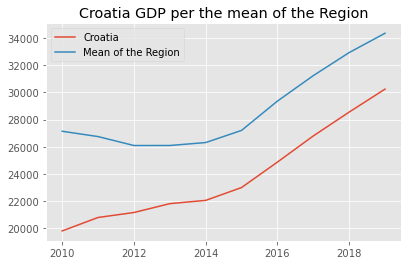

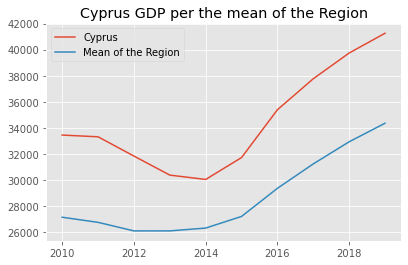

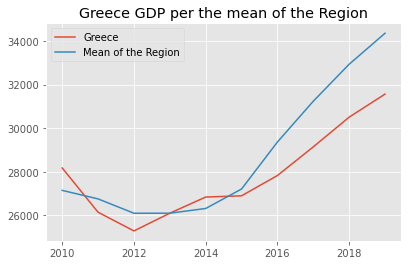

In [311]:
# GDP
plot_indicator_per_Region(data_plt,'Croatia','Croatia','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','GDP','Country Name',delta=10)

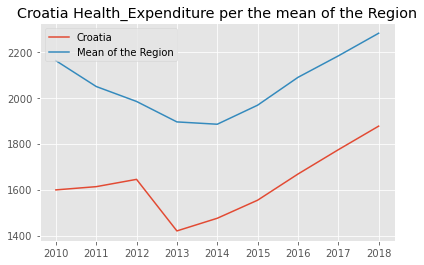

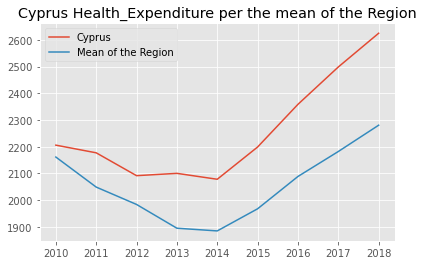

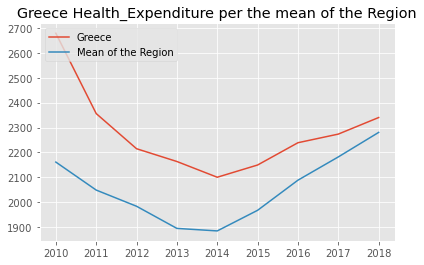

In [312]:
# Health_Expenditure
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Health_Expenditure','Country Name',delta=10)

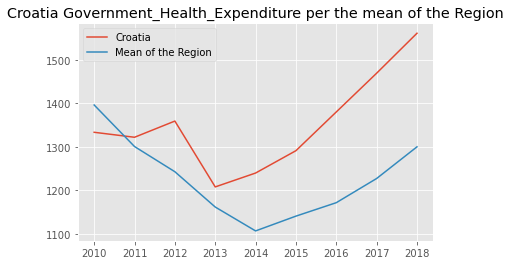

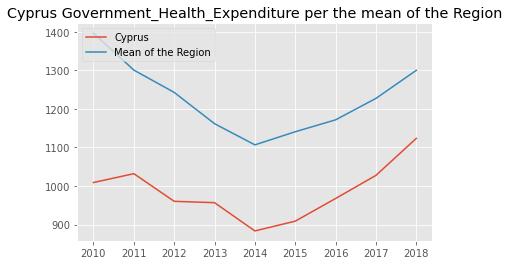

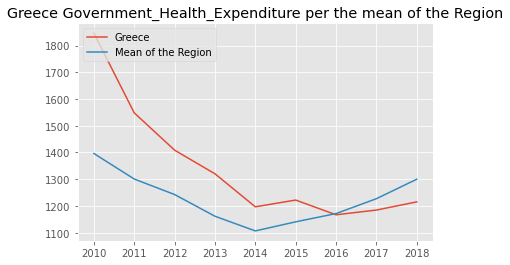

In [313]:
# Government_Health_Expenditure
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Government_Health_Expenditure','Country Name',delta=10)

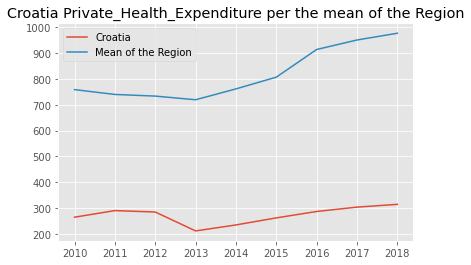

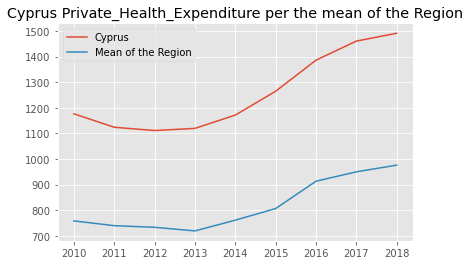

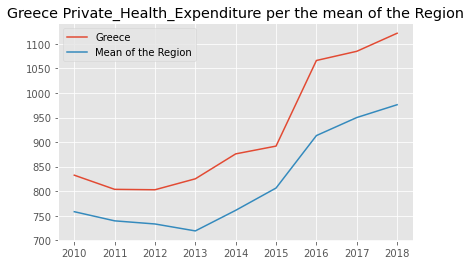

In [314]:
# Private_Health_Expenditure
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Private_Health_Expenditure','Country Name',delta=10)

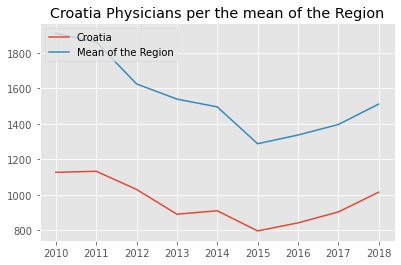

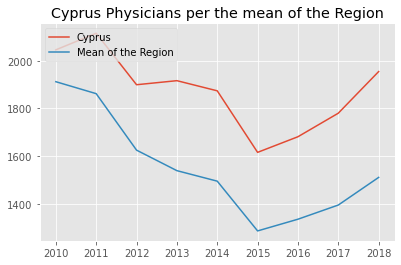

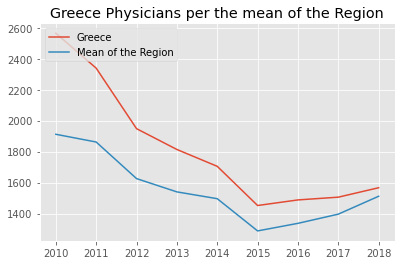

In [315]:
# Physicians
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Physicians','Country Name',delta=10)

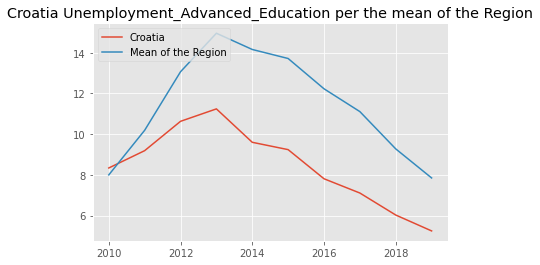

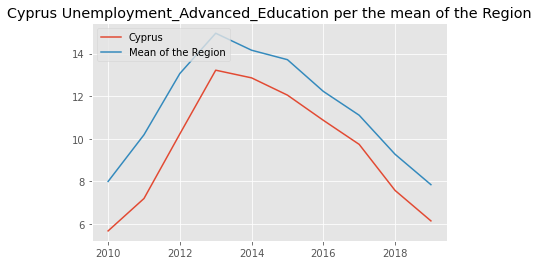

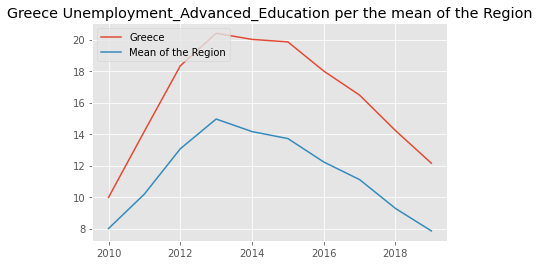

In [316]:
# Unemployment_Advanced_Education
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Unemployment_Advanced_Education','Country Name',delta=10)

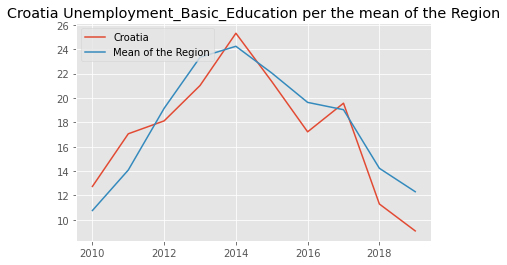

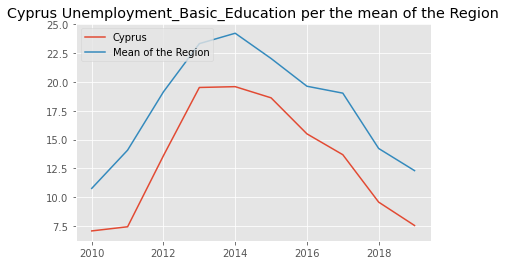

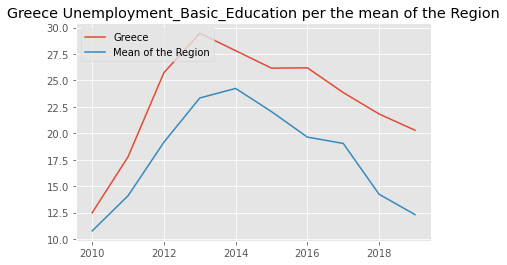

In [317]:
# Unemployment_Basic_Education
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Unemployment_Basic_Education','Country Name',delta=10)

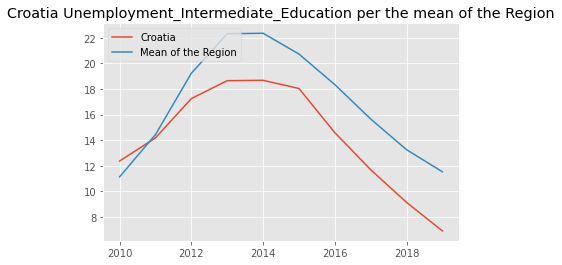

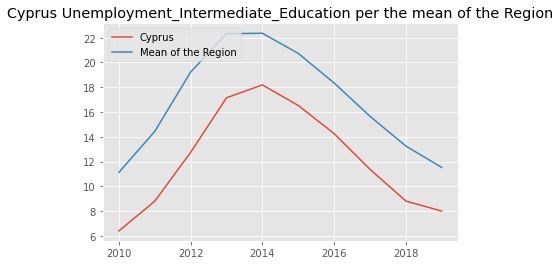

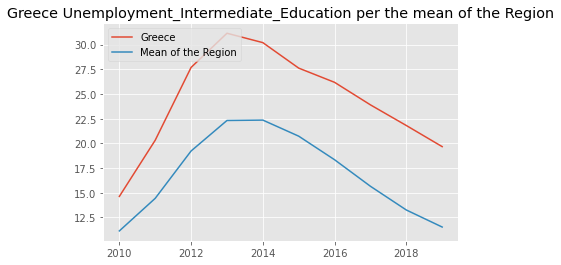

In [318]:
# Unemployment_Intermediate_Education
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Unemployment_Intermediate_Education','Country Name',delta=10)

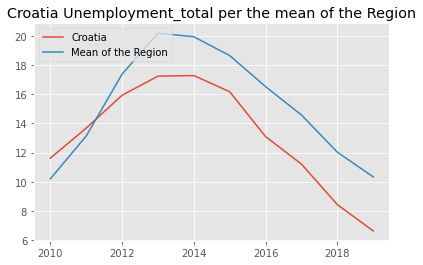

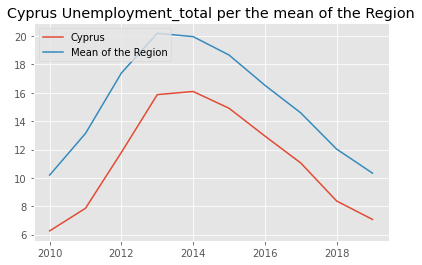

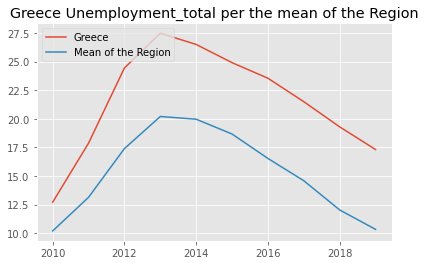

In [320]:
# Unemployment_total
plot_indicator_per_Region(data_plt,'Croatia','Croatia','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','Unemployment_total','Country Name',delta=10)

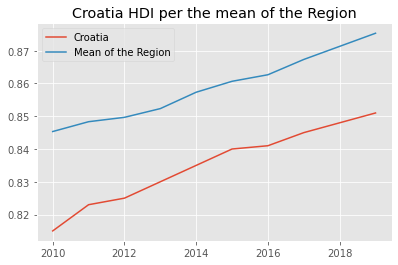

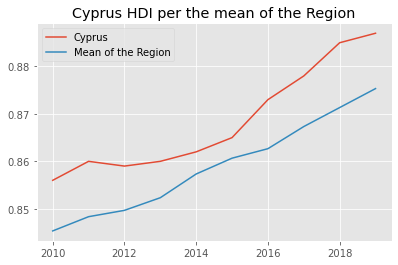

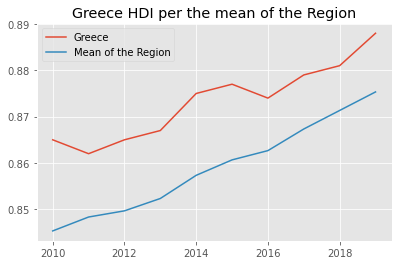

In [321]:
# HDI
plot_indicator_per_Region(data_plt,'Croatia','Croatia','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Cyprus','Cyprus','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Greece','Greece','HDI','Country Name',delta=10)

### Region-2

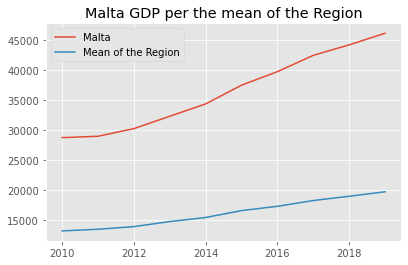

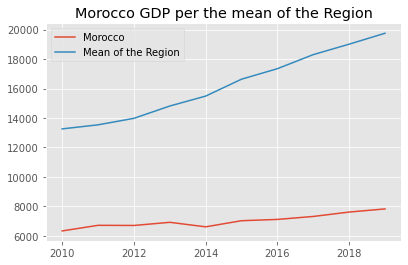

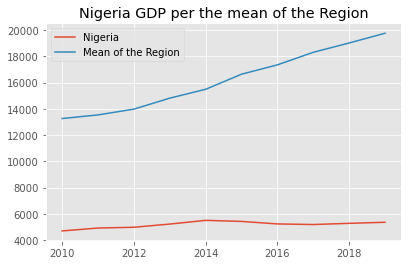

In [322]:
# GDP
plot_indicator_per_Region(data_plt,'Malta','Malta','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','GDP','Country Name',delta=10)

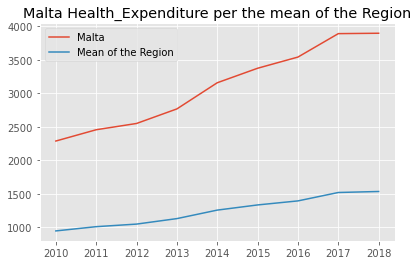

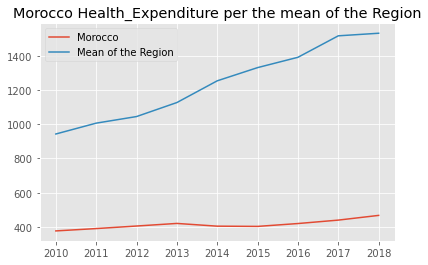

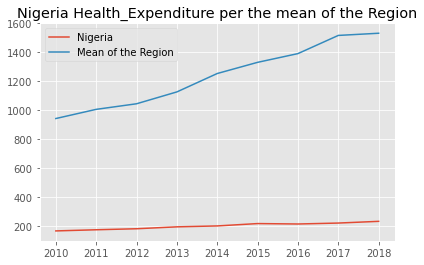

In [323]:
# Health_Expenditure
plot_indicator_per_Region(data_plt,'Malta','Malta','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','Health_Expenditure','Country Name',delta=10)

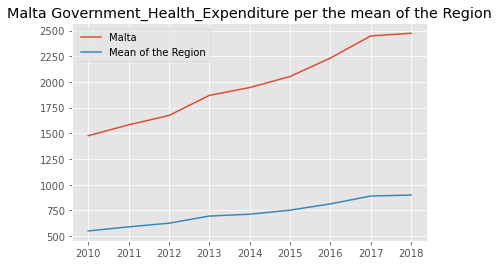

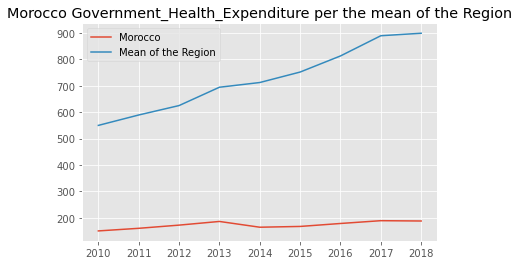

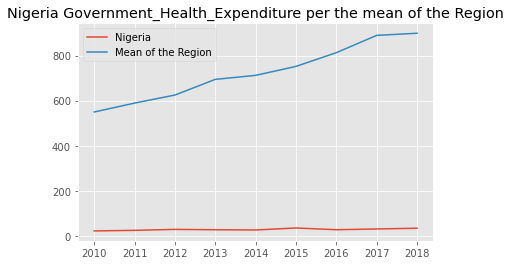

In [324]:
# Government_Health_Expenditure
plot_indicator_per_Region(data_plt,'Malta','Malta','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','Government_Health_Expenditure','Country Name',delta=10)


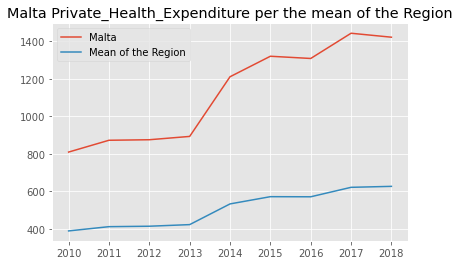

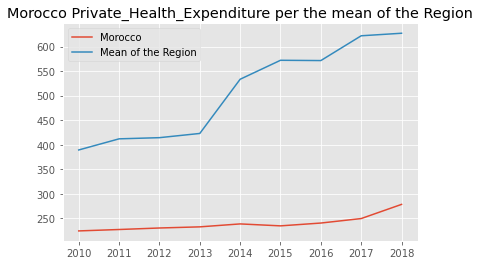

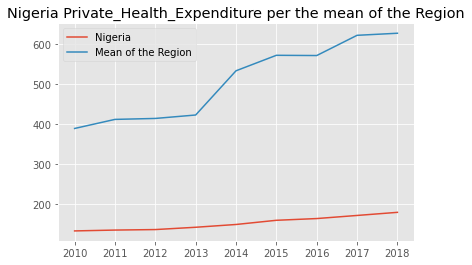

In [325]:
# Private_Health_Expenditure
plot_indicator_per_Region(data_plt,'Malta','Malta','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','Private_Health_Expenditure','Country Name',delta=10)


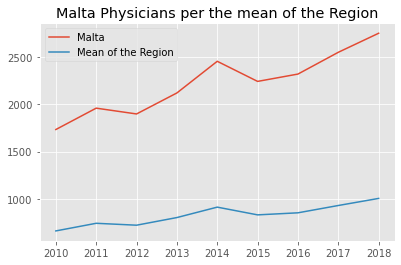

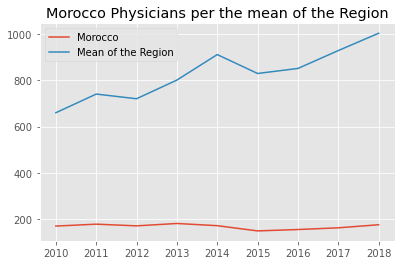

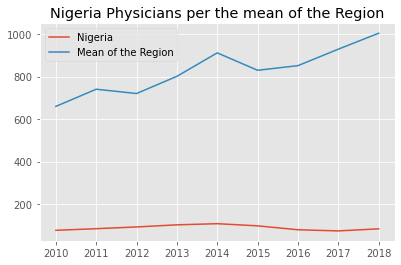

In [326]:
# Physicians
plot_indicator_per_Region(data_plt,'Malta','Malta','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','Physicians','Country Name',delta=10)


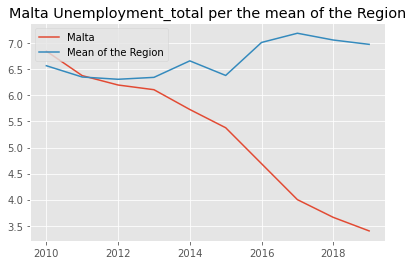

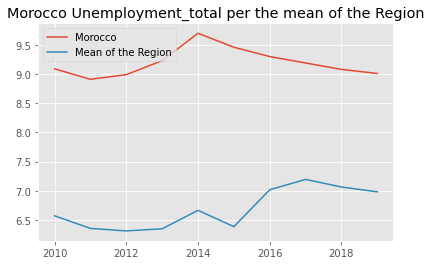

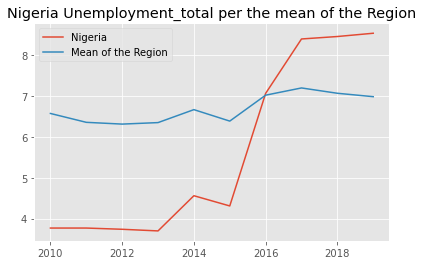

In [330]:
# Unemployment_total
plot_indicator_per_Region(data_plt,'Malta','Malta','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','Unemployment_total','Country Name',delta=10)


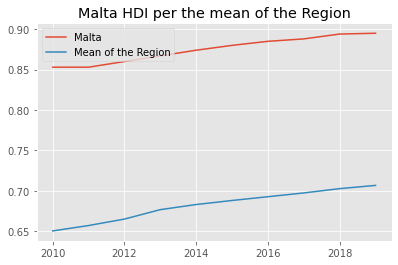

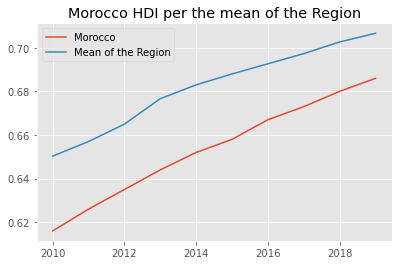

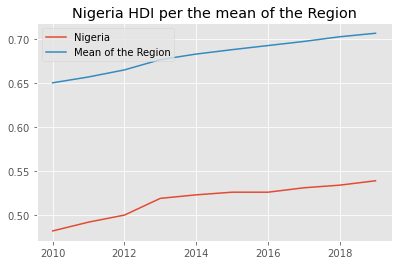

In [331]:
# HDI
plot_indicator_per_Region(data_plt,'Malta','Malta','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Morocco','Morocco','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Nigeria','Nigeria','HDI','Country Name',delta=10)


### Region-3

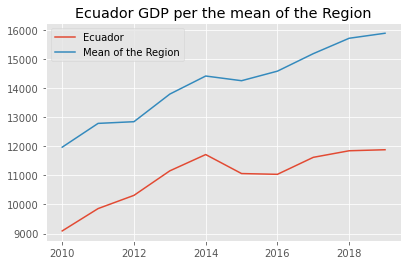

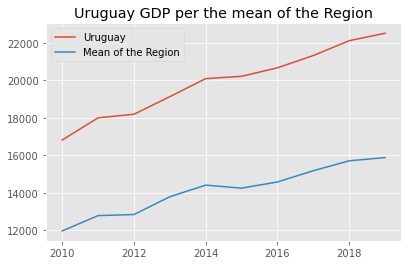

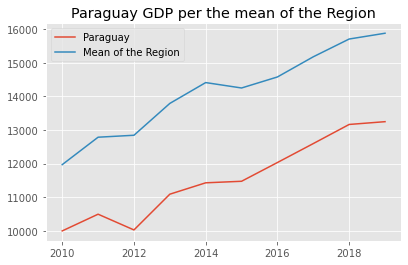

In [332]:
# GDP
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','GDP','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','GDP','Country Name',delta=10)


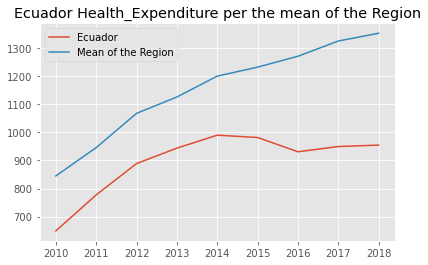

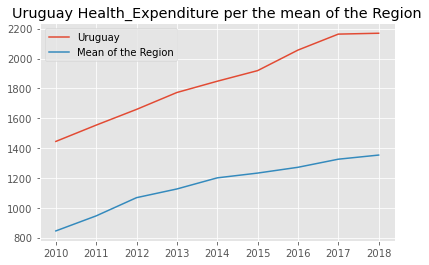

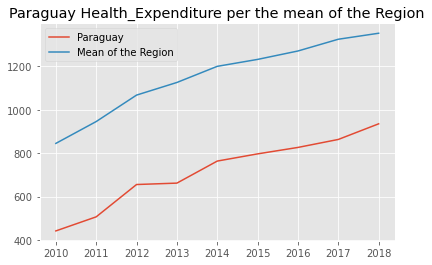

In [333]:
# Health_Expenditure
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Health_Expenditure','Country Name',delta=10)


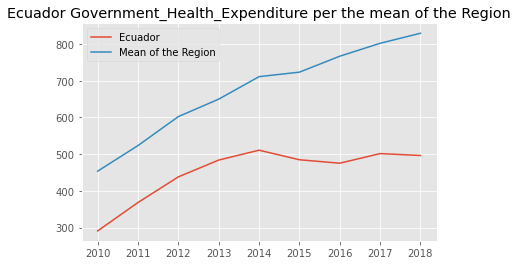

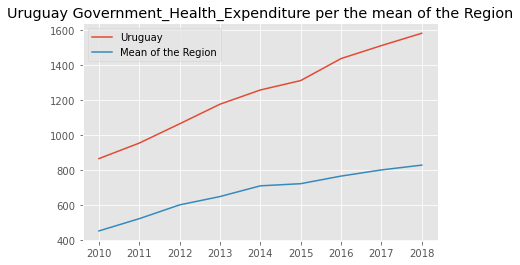

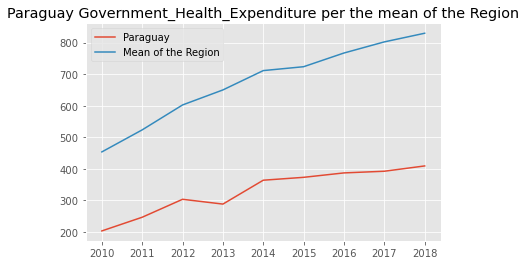

In [334]:
# Government_Health_Expenditure
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Government_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Government_Health_Expenditure','Country Name',delta=10)


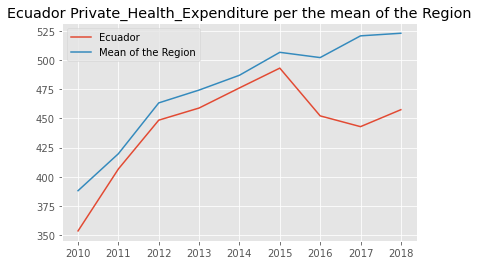

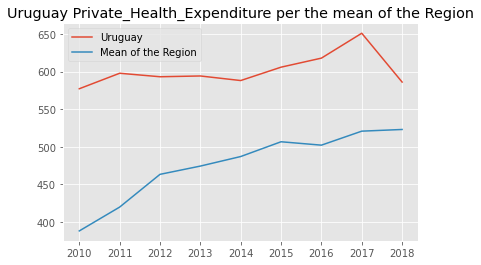

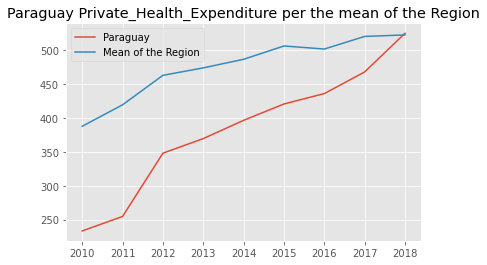

In [335]:
# Private_Health_Expenditure
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Private_Health_Expenditure','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Private_Health_Expenditure','Country Name',delta=10)


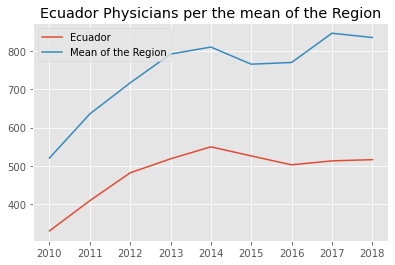

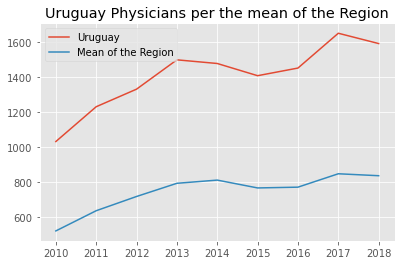

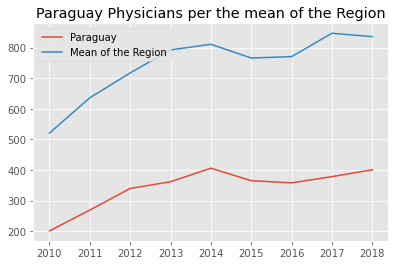

In [336]:
# Physicians
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Physicians','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Physicians','Country Name',delta=10)


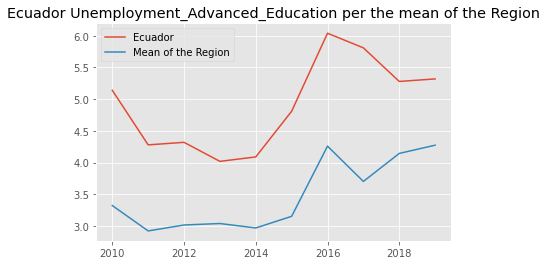

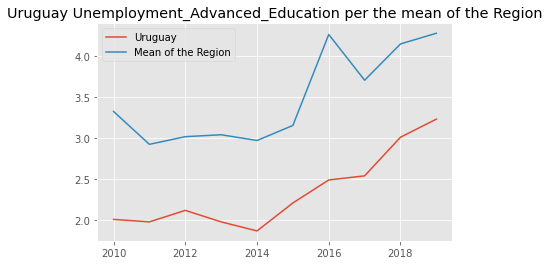

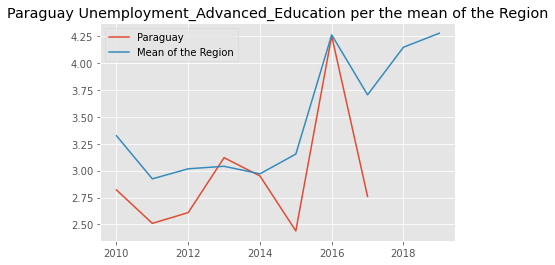

In [337]:
# Unemployment_Advanced_Education
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Unemployment_Advanced_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Unemployment_Advanced_Education','Country Name',delta=10)


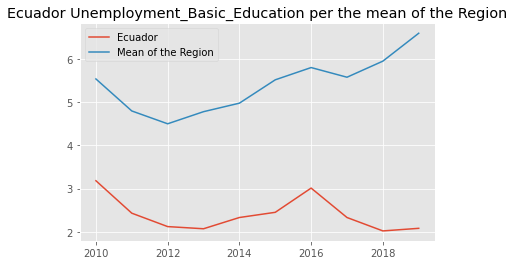

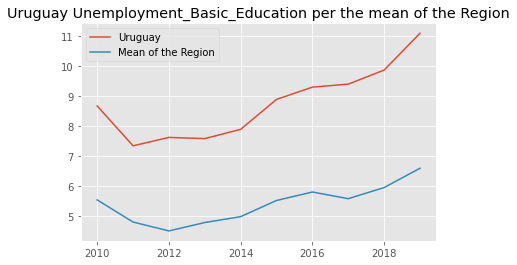

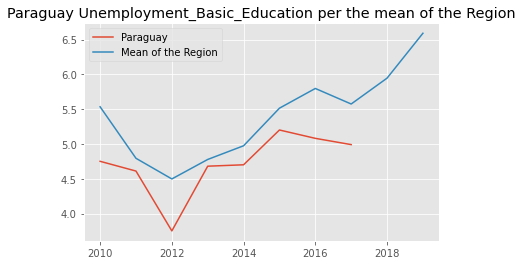

In [338]:
# Unemployment_Basic_Education
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Unemployment_Basic_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Unemployment_Basic_Education','Country Name',delta=10)


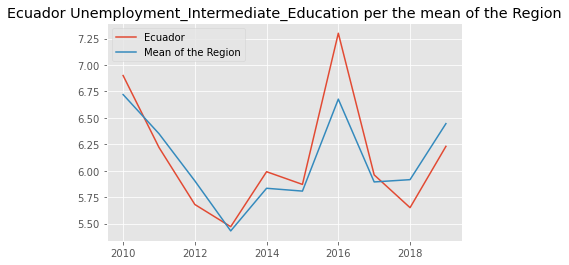

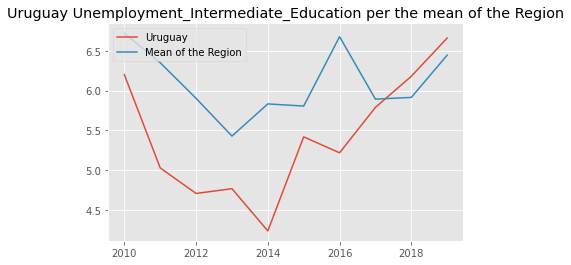

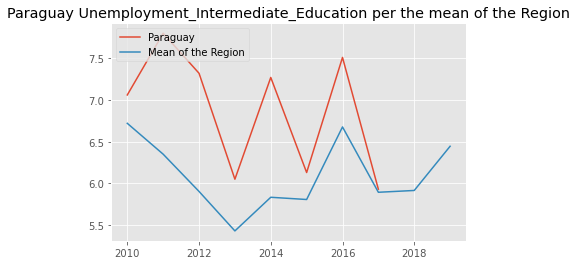

In [339]:
# Unemployment_Intermediate_Education
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Unemployment_Intermediate_Education','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Unemployment_Intermediate_Education','Country Name',delta=10)


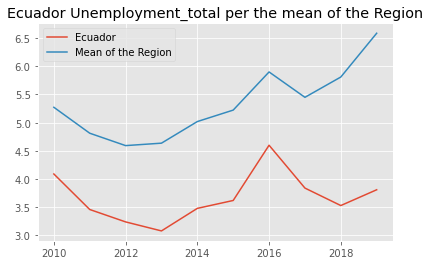

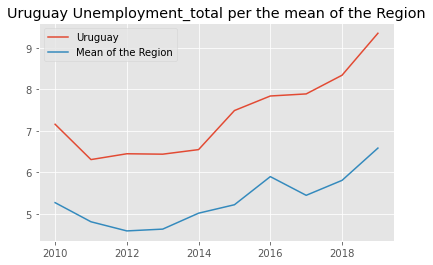

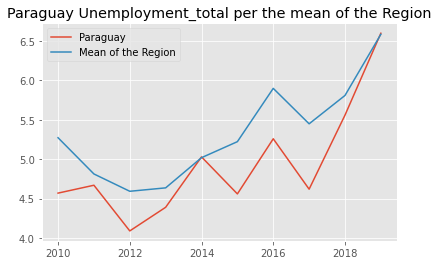

In [340]:
# Unemployment_total
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','Unemployment_total','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','Unemployment_total','Country Name',delta=10)


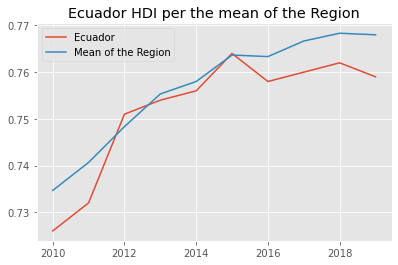

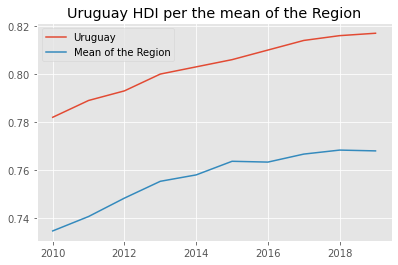

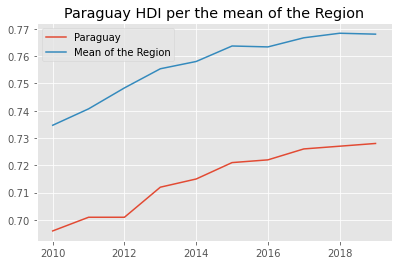

In [341]:
# HDI
plot_indicator_per_Region(data_plt,'Ecuador','Ecuador','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Uruguay','Uruguay','HDI','Country Name',delta=10)
plot_indicator_per_Region(data_plt,'Paraguay','Paraguay','HDI','Country Name',delta=10)


### Save Outputfile

In [343]:
data_plt.to_csv(r'D:\PhD\DataScience\SummerSchool2021\Task\4-sent\my_new_file_part2.csv', index=True)

### Prepating for Modelling
- Linear Regression

In [595]:
data_plt

Country Name  Date                      Region           GDP  \
0       Croatia  2010       Europe & Central Asia  19814.601971   
1       Croatia  2011       Europe & Central Asia  20804.388883   
2       Croatia  2012       Europe & Central Asia  21168.851231   
3       Croatia  2013       Europe & Central Asia  21820.520519   
4       Croatia  2014       Europe & Central Asia  22060.741131   
5       Croatia  2015       Europe & Central Asia  23005.101142   
6       Croatia  2016       Europe & Central Asia  24876.309669   
7       Croatia  2017       Europe & Central Asia  26800.081592   
8       Croatia  2018       Europe & Central Asia  28554.383511   
9       Croatia  2019       Europe & Central Asia  30246.049304   
10       Cyprus  2010       Europe & Central Asia  33445.906489   
11       Cyprus  2011       Europe & Central Asia  33313.579149   
12       Cyprus  2012       Europe & Central Asia  31834.676363   
13       Cyprus  2013       Europe & Central Asia  30375.106316   
14       Cyprus  2014       Europe & Central Asia  30042.827106   
15       Cyprus  2015       Europe & Central Asia  31722.216208   
16       Cyprus  2016       Europe & Central Asia  35388.832526   
17       Cyprus  2017       Europe & Central Asia  37766.901657   
18       Cyprus  2018       Europe & Central Asia  39737.325187   
19       Cyprus  2019       Europe & Central Asia  41254.404588   
20      Ecuador  2010   Latin America & Caribbean   9090.308233   
21      Ecuador  2011   Latin America & Caribbean   9857.521816   
22      Ecuador  2012   Latin America & Caribbean  10311.402598   
23      Ecuador  2013   Latin America & Caribbean  11153.684502   
24      Ecuador  2014   Latin America & Caribbean  11713.171502   
25      Ecuador  2015   Latin America & Caribbean  11060.287633   
26      Ecuador  2016   Latin America & Caribbean  11034.269848   
27      Ecuador  2017   Latin America & Caribbean  11617.908758   
28      Ecuador  2018   Latin America & Caribbean  11843.393637   
29      Ecuador  2019   Latin America & Caribbean  11878.718364   
30       Greece  2010       Europe & Central Asia  28172.145193   
31       Greece  2011       Europe & Central Asia  26141.319554   
32       Greece  2012       Europe & Central Asia  25284.464090   
33       Greece  2013       Europe & Central Asia  26097.871858   
34       Greece  2014       Europe & Central Asia  26838.455168   
35       Greece  2015       Europe & Central Asia  26895.325651   
36       Greece  2016       Europe & Central Asia  27826.150940   
37       Greece  2017       Europe & Central Asia  29140.763532   
38       Greece  2018       Europe & Central Asia  30504.403616   
39       Greece  2019       Europe & Central Asia  31562.593772   
40        Malta  2010  Middle East & North Africa  28744.700292   
41        Malta  2011  Middle East & North Africa  28973.195599   
42        Malta  2012  Middle East & North Africa  30243.987802   
43        Malta  2013  Middle East & North Africa  32295.878732   
44        Malta  2014  Middle East & North Africa  34344.111631   
45        Malta  2015  Middle East & North Africa  37455.070423   
46        Malta  2016  Middle East & North Africa  39695.399155   
47        Malta  2017  Middle East & North Africa  42404.332748   
48        Malta  2018  Middle East & North Africa  44141.305527   
49        Malta  2019  Middle East & North Africa  46071.333151   
50      Morocco  2010  Middle East & North Africa   6332.123545   
51      Morocco  2011  Middle East & North Africa   6712.326003   
52      Morocco  2012  Middle East & North Africa   6702.418324   
53      Morocco  2013  Middle East & North Africa   6916.015457   
54      Morocco  2014  Middle East & North Africa   6609.609108   
55      Morocco  2015  Middle East & North Africa   7024.963089   
56      Morocco  2016  Middle East & North Africa   7112.999215   
57      Morocco  2017  Middle East & North Africa   7314.154487   
58      Morocco  2018  Middle East & North Africa 

### Filling NAs in the Dataframe

In [607]:
test = data_plt.copy()

In [608]:
test.dtypes

Country Name                                   object
Date                                           object
Region                                         object
GDP                                           float64
Adult_literacy                                float64
Current_Education_Expenditure_tot             float64
Hospital_Beds                                 float64
Physicians                                    float64
Health_Expenditure                            float64
Government_Health_Expenditure                 float64
Private_Health_Expenditure                    float64
Salaried_Workers                              float64
Labor_Force_15_24y                            float64
Labor_Force_Advanced_Education                float64
Unemployment_Advanced_Education               float64
Unemployment_Basic_Education                  float64
Unemployment_Intermediate_Education           float64
Unemployment_total                            float64
Mortality_rate              

In [617]:
# test = test.drop(['Date', 'Region', 'GDP', 'Country Name'], axis = 1)

In [618]:
# from pandas.api.types import is_string_dtype
# from pandas.api.types import is_numeric_dtype
# def painful_fillna(df, fillvalue=0):
#     df = df.copy()
#     for col in df.columns:
#         for i, value in enumerate(df[col].values):
#             if is_numeric_dtype(value):
#                 if np.isnan(value):
#                     df[col][i] = 0
                    
#         for i, value in enumerate(df[col].values):
#             if is_numeric_dtype(value):
#                 if np.isnan(value):
#                      if i == 0:
#                          # df[col][i] = fillvalue
#                          df[col][i] = df[col][i+1]
#                     if i > 0:
#                          if df[col][i-1]>0 & df[col][i+1]>0 & df[1][i-1] == df[1][i+1]:
#                                  df[col][i] = (df[col][i+1]-df[col][i-1])/2
# #                         if df[col][i-1]>0 & df[col][i+1]=0 & df[1][i-1] == df[1][i+1]:
# #                                 df[col][i] = df[col][i-1]
# #                         if df[col][i-1]=0 & df[col][i+1]>0 & df[1][i-1] == df[1][i+1]:
# #                             df[col][i] = df[col][i+1]
#     return(df)

# # df = pd.DataFrame({'A':[1,2,'NaN',3,4,'NaN'],'B':[2,'NaN',3,'NaN',9, 'NaN']})
# # df = df.convert_objects(convert_numeric=True)
# # painful_fillna(df)

In [616]:
#     for col in test.columns:
#         for i, value in enumerate(test[col].values):
#             if is_numeric_dtype(value):
#                 if np.isnan(value):
#                       if i == 0:
#                         test[col][i] = test[col][i+1]
#                         print(test[col][i])

In [614]:
# painful_fillna(test)

In [615]:
#     for col in data_plt.columns:
#         for i, value in enumerate(data_plt[col].values):
#             if np.isnan(value):
#                # data_plt[col][i] = fillvalue

In [372]:
Y = data_plt['GDP']
X = data_plt[['Health_Expenditure','Unemployment_total', 'HDI', 'Life_Expectancy']]

In [374]:
# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 

In [367]:
# pipe = Pipiline([('poly'),PolynomialFeatures(include_bias = False)), ('scaler', StandardScaler()), ('model', LinearRegressor())])

## Linear Regression Model

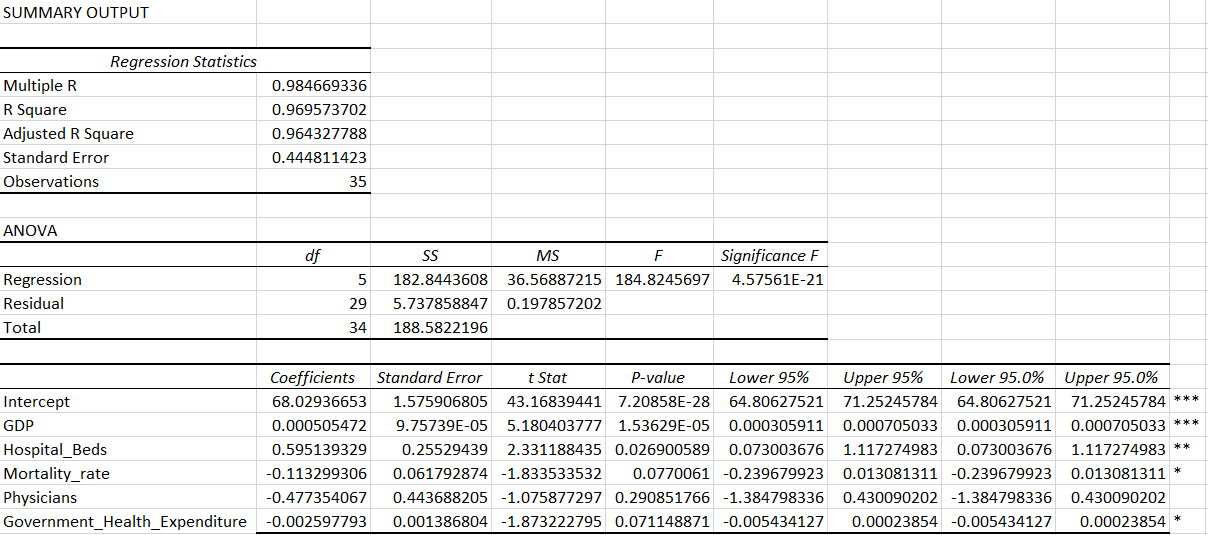# 

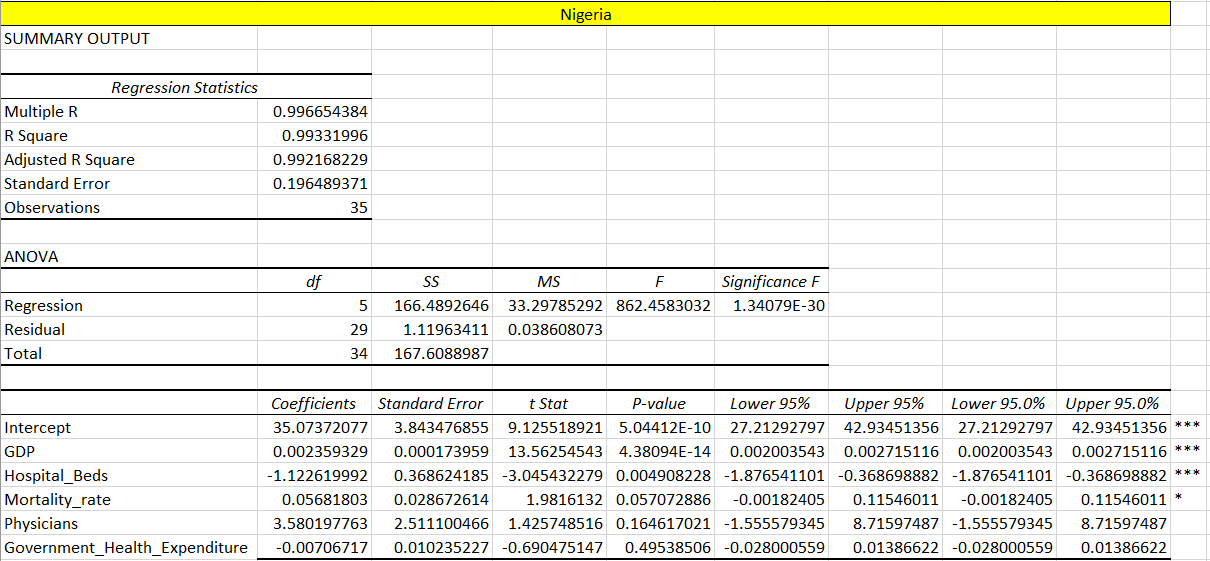# 

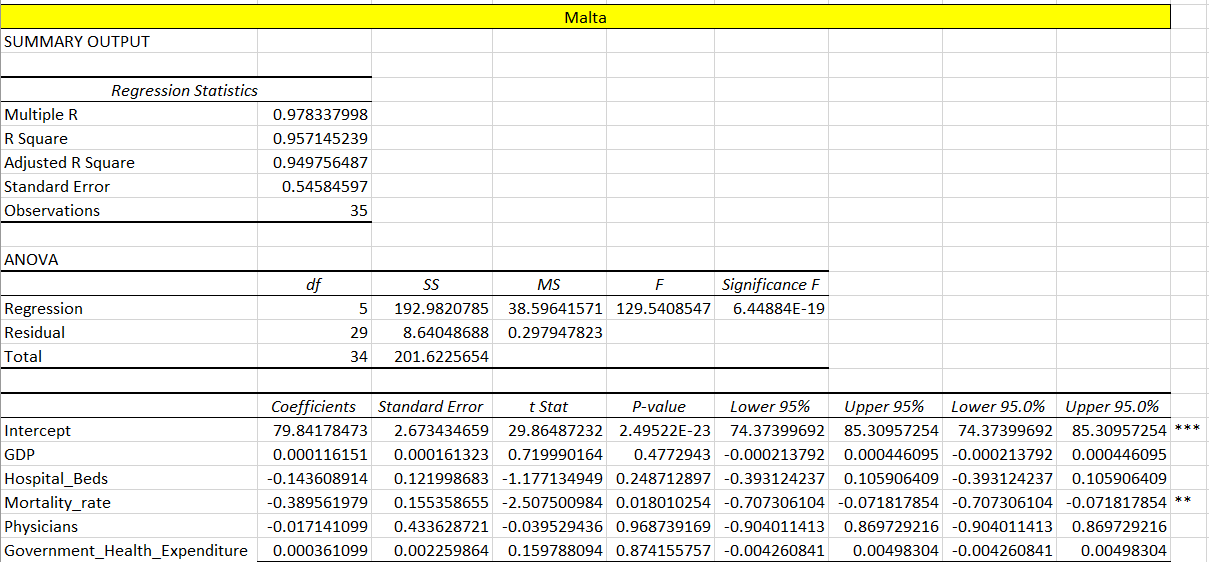# 

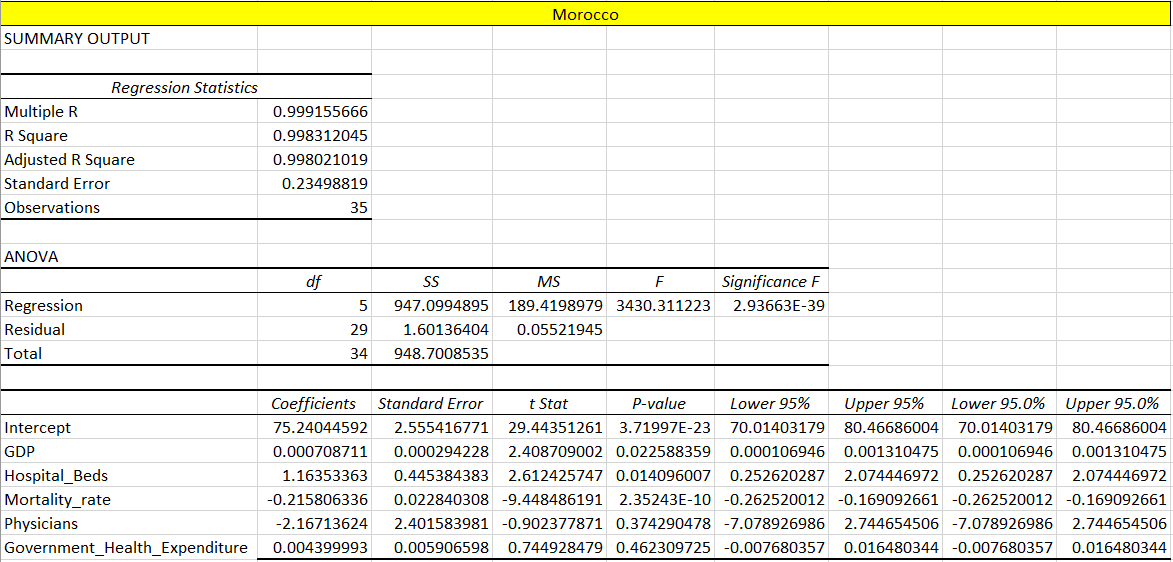# 

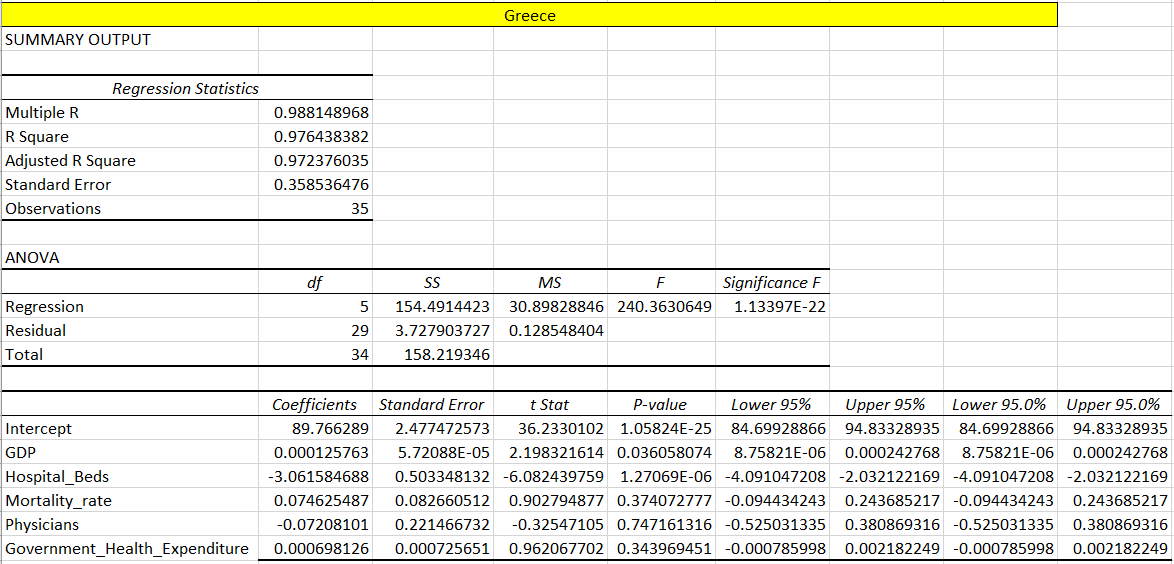# 

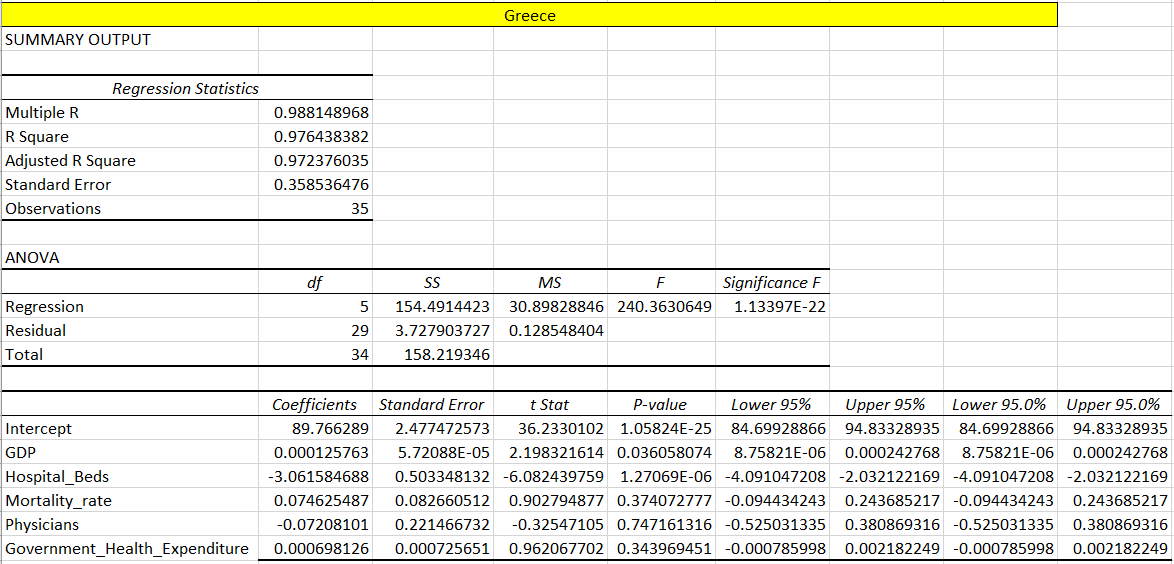# 

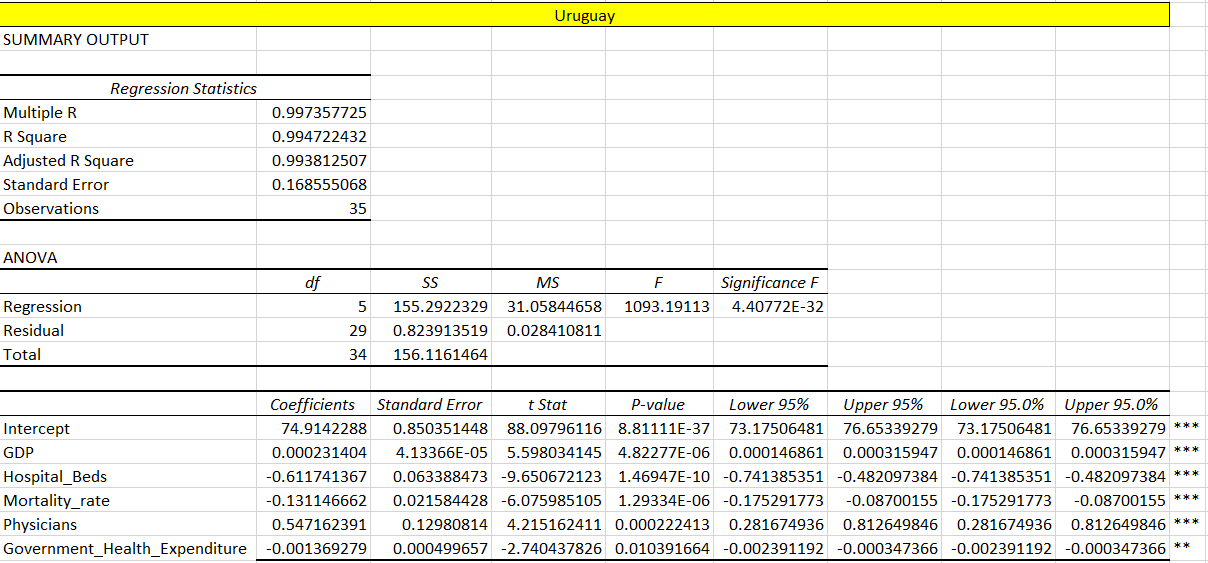# Here we 

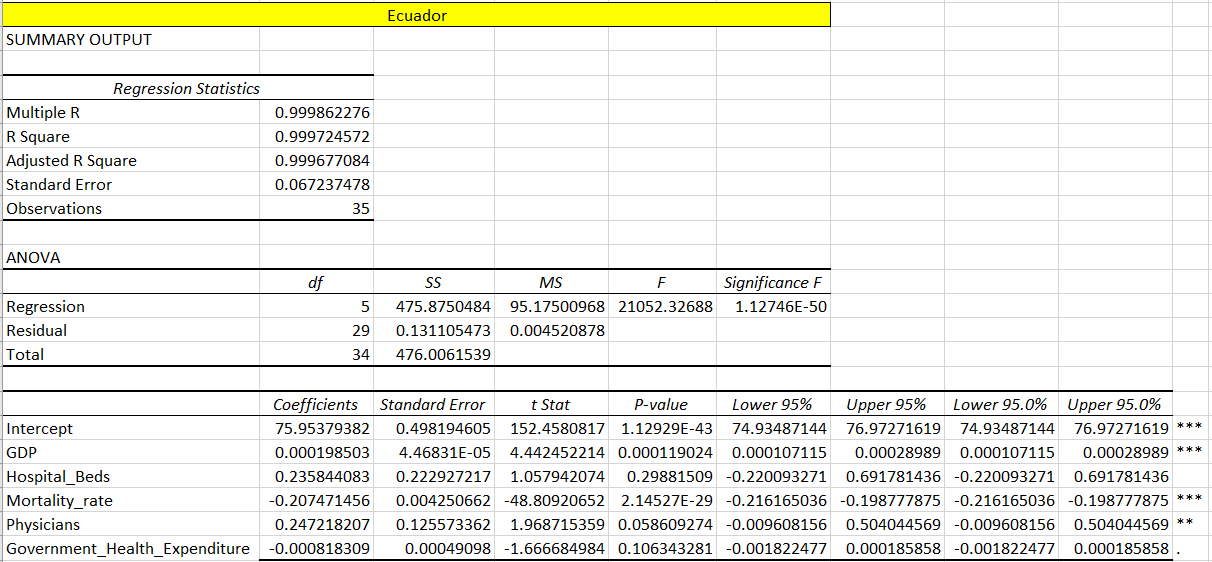# 

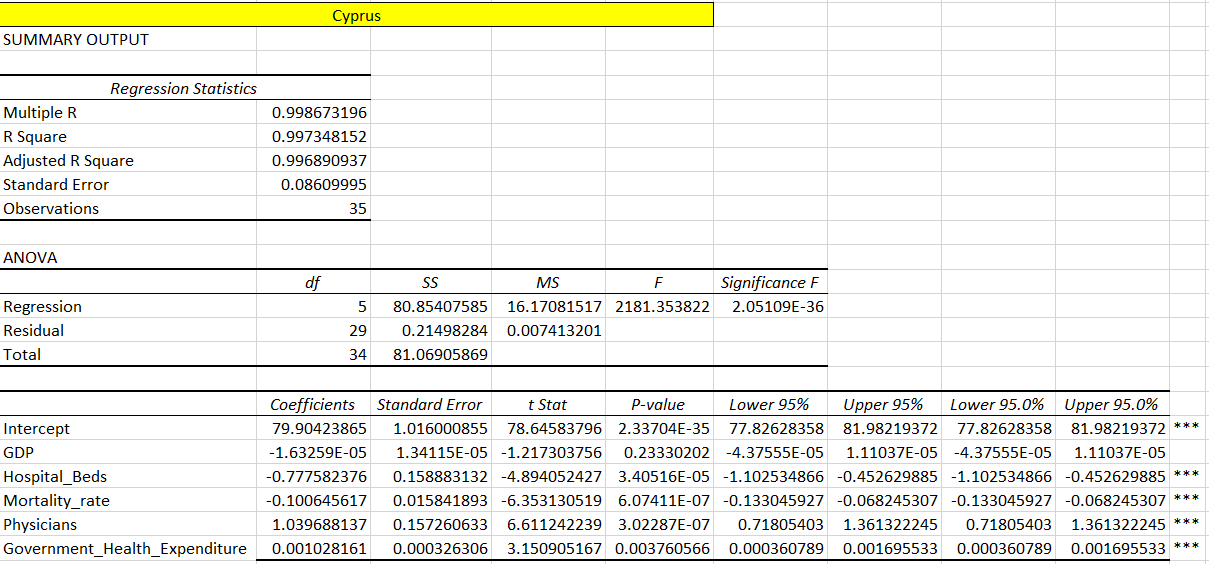# 

## Conclusion and Proposals